In [ ]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 캡스톤 프로젝트/****데이터 통합본 (추가)/5세 연령별 데이터(통합본).xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 캡스톤 프로젝트/****데이터 통합본 (추가)/입원외래 데이터(통합본).xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 캡스톤 프로젝트/****데이터 통합본 (추가)/요양기관종별 데이터(통합본).xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 캡스톤 프로젝트/****데이터 통합본 (추가)/요양소재지별 데이터(통합본).xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 캡스톤 프로젝트/****데이터 통합본 (추가)/총계 데이터(통합본).xlsx')
df6 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 캡스톤 프로젝트/****데이터 통합본 (추가)/소계 데이터(통합본).xlsx')
df7 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 과제/통합 데이터/질병명칭의 사본 (1).xlsx')

In [ ]:
df1

,코드,심사년도,연령구분,성별구분,환자수(명),내원일수(일),청구건수(건),요양급여비용총액(천원),보험자부담금(천원)
0,A00,2016,1,M,2,3,3,44,35
1,A00,2016,1,F,4,4,4,66,51
2,A00,2016,2,M,2,2,2,45,31
3,A00,2016,2,F,4,4,4,69,46
4,A00,2016,3,M,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
298515,Z99,2020,15,F,41,799,145,99272,81031
298516,Z99,2020,16,M,59,838,423,137089,114016
298517,Z99,2020,16,F,49,438,105,57587,46363
298518,Z99,2020,17,M,39,1480,134,210427,175484


In [1]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 캡스톤 프로젝트/****데이터 통합본 (추가)/5세 연령별 데이터(통합본).xlsx')

In [2]:
df1.rename(columns={'코드':'code','심사년도':'year','연령구분':'age','성별구분':'sex','환자수(명)':'patients','내원일수(일)':'visits','청구건수(건)':'claims','요양급여비용총액(천원)':'total cost','보험자부담금(천원)':'insurance premium'},inplace=True)

In [3]:
df1

,code,year,age,sex,patients,visits,claims,total cost,insurance premium
0,A00,2016,1,M,2,3,3,44,35
1,A00,2016,1,F,4,4,4,66,51
2,A00,2016,2,M,2,2,2,45,31
3,A00,2016,2,F,4,4,4,69,46
4,A00,2016,3,M,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
298515,Z99,2020,15,F,41,799,145,99272,81031
298516,Z99,2020,16,M,59,838,423,137089,114016
298517,Z99,2020,16,F,49,438,105,57587,46363
298518,Z99,2020,17,M,39,1480,134,210427,175484


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298520 entries, 0 to 298519
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   code               298520 non-null  object
 1   year               298520 non-null  int64 
 2   age                298520 non-null  int64 
 3   sex                298520 non-null  object
 4   patients           298520 non-null  int64 
 5   visits             298520 non-null  int64 
 6   claims             298520 non-null  int64 
 7   total cost         298520 non-null  int64 
 8   insurance premium  298520 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 20.5+ MB


In [5]:
df1 = df1.astype({'age': 'int','year':'object'})

In [6]:
pd.options.display.float_format = '{:.2f}'.format

In [7]:
df_m = df1[df1['sex'] == 'M']
df_m = df_m.reset_index()
df_m.drop(['index'], axis=1, inplace=True)
df_m.head()

,code,year,age,sex,patients,visits,claims,total cost,insurance premium
0,A00,2016,1,M,2,3,3,44,35
1,A00,2016,2,M,2,2,2,45,31
2,A00,2016,3,M,0,0,0,0,0
3,A00,2016,4,M,3,3,3,51,32
4,A00,2016,5,M,2,6,3,869,675


In [8]:
df_f = df1[df1['sex'] == 'F']
df_f = df_f.reset_index()
df_f.drop(['index'], axis=1, inplace=True)
df_f.head()

,code,year,age,sex,patients,visits,claims,total cost,insurance premium
0,A00,2016,1,F,4,4,4,66,51
1,A00,2016,2,F,4,4,4,69,46
2,A00,2016,3,F,4,4,4,117,67
3,A00,2016,4,F,7,19,7,3956,3092
4,A00,2016,5,F,3,11,4,2345,1878


In [9]:
def age_m(i):
    result = df_m[df_m['age'] == i]
    result = result.reset_index()
    result.drop(['index'], axis=1, inplace=True)
    return result

In [10]:
df_m_1 = age_m(1)
df_m_2 = age_m(2)
df_m_3 = age_m(3)
df_m_4 = age_m(4)
df_m_5 = age_m(5)
df_m_6 = age_m(6)
df_m_7 = age_m(7)
df_m_8 = age_m(8)
df_m_9 = age_m(9)
df_m_10 = age_m(10)
df_m_11 = age_m(11)
df_m_12 = age_m(12)
df_m_13 = age_m(13)
df_m_14 = age_m(14)
df_m_15 = age_m(15)
df_m_16 = age_m(16)
df_m_17 = age_m(17)

In [11]:
def age_f(i):
    result = df_f[df_f['age'] == i]
    result = result.reset_index()
    result.drop(['index'], axis=1, inplace=True)
    return result

In [12]:
df_f_1 = age_f(1)
df_f_2 = age_f(2)
df_f_3 = age_f(3)
df_f_4 = age_f(4)
df_f_5 = age_f(5)
df_f_6 = age_f(6)
df_f_7 = age_f(7)
df_f_8 = age_f(8)
df_f_9 = age_f(9)
df_f_10 = age_f(10)
df_f_11 = age_f(11)
df_f_12 = age_f(12)
df_f_13 = age_f(13)
df_f_14 = age_f(14)
df_f_15 = age_f(15)
df_f_16 = age_f(16)
df_f_17 = age_f(17)

In [13]:
def age_f(i):
    result = df_f[df_f['age'] == i]
    result = result.reset_index()
    result.drop(['index'], axis=1, inplace=True)
    return result

In [14]:
df_f_1 = age_f(1)
df_f_2 = age_f(2)
df_f_3 = age_f(3)
df_f_4 = age_f(4)
df_f_5 = age_f(5)
df_f_6 = age_f(6)
df_f_7 = age_f(7)
df_f_8 = age_f(8)
df_f_9 = age_f(9)
df_f_10 = age_f(10)
df_f_11 = age_f(11)
df_f_12 = age_f(12)
df_f_13 = age_f(13)
df_f_14 = age_f(14)
df_f_15 = age_f(15)
df_f_16 = age_f(16)
df_f_17 = age_f(17)

In [15]:
df_f_17

,code,year,age,sex,patients,visits,claims,total cost,insurance premium
0,A00,2016,17,F,5,8,6,465,359
1,A01,2016,17,F,1,1,1,31,16
2,A02,2016,17,F,85,349,155,35053,26344
3,A03,2016,17,F,15,25,25,437,287
4,A04,2016,17,F,12903,51298,22533,5615016,4325693
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,17,F,3656,15195,11045,1288592,762016
8776,Z96,2020,17,F,25506,76571,72713,2882620,2075282
8777,Z97,2020,17,F,747,950,938,38603,28352
8778,Z98,2020,17,F,7348,32841,27595,1416763,1041914


In [16]:
def age10sm(i, j, k, l):
    asdfzxcv = i[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}] + j[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}]
    asdfzxcv = asdfzxcv.reindex(columns=['patients', 'visits', 'claims', 'total cost', 'insurance premium'])
    
    index = i.iloc[:,0:4]
    asdfzxcv = pd.concat([index, asdfzxcv], axis=1)
    asdfzxcv['age'].replace(k, l, inplace=True)
    
    return asdfzxcv

In [17]:
df_m_0s = age10sm(df_m_1, df_m_2, 1, '0s')
df_m_10s = age10sm(df_m_3, df_m_4, 3, '10s')
df_m_20s = age10sm(df_m_5, df_m_6, 5, '20s')
df_m_30s = age10sm(df_m_7, df_m_8, 7, '30s')
df_m_40s = age10sm(df_m_9, df_m_10, 9, '40s')
df_m_50s = age10sm(df_m_11, df_m_12, 11, '50s')
df_m_60s = age10sm(df_m_13, df_m_14, 13, '60s')
df_m_70s = age10sm(df_m_15, df_m_16, 15, '70s')

df_m_17['age'].replace(17, '80+', inplace=True)
df_m_80s = df_m_17

In [18]:
def age10sf(i, j, k, l):
    asdfzxcv = i[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}] + j[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}]
    asdfzxcv = asdfzxcv.reindex(columns=['patients', 'visits', 'claims', 'total cost', 'insurance premium'])
    
    index = i.iloc[:,0:4]
    asdfzxcv = pd.concat([index, asdfzxcv], axis=1)
    asdfzxcv['age'].replace(k, l, inplace=True)
    
    return asdfzxcv

In [19]:
df_f_0s = age10sf(df_f_1, df_f_2, 1, '0s')
df_f_10s = age10sf(df_f_3, df_f_4, 3, '10s')
df_f_20s = age10sf(df_f_5, df_f_6, 5, '20s')
df_f_30s = age10sf(df_f_7, df_f_8, 7, '30s')
df_f_40s = age10sf(df_f_9, df_f_10, 9, '40s')
df_f_50s = age10sf(df_f_11, df_f_12, 11, '50s')
df_f_60s = age10sf(df_f_13, df_f_14, 13, '60s')
df_f_70s = age10sf(df_f_15, df_f_16, 15, '70s')

df_f_17['age'].replace(17, '80+', inplace=True)
df_f_80s = df_f_17

In [20]:
def age10(i, j):
    asdfzxcv = i[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}] + j[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}]
    asdfzxcv = asdfzxcv.reindex(columns=['patients', 'visits', 'claims', 'total cost', 'insurance premium'])
    
    index = index = i.iloc[:,0:3]
    asdfzxcv = pd.concat([index, asdfzxcv], axis=1)
    return asdfzxcv

In [21]:
df_0s = age10(df_m_0s, df_f_0s)
df_10s = age10(df_m_10s, df_f_10s)
df_20s = age10(df_m_20s, df_f_20s)
df_30s = age10(df_m_30s, df_f_30s)
df_40s = age10(df_m_40s, df_f_40s)
df_50s = age10(df_m_50s, df_f_50s)
df_60s = age10(df_m_60s, df_f_60s)
df_70s = age10(df_m_70s, df_f_70s)
df_80s = age10(df_m_80s, df_f_80s)

In [22]:
df_ten = pd.concat([df_0s,df_10s, df_20s, df_30s, df_40s, df_50s, df_60s, df_70s, df_80s], axis=0)
df_ten = df_ten.sort_values(by = ['code', 'year', 'age'], ascending=True)
df_ten = df_ten.reset_index()
df_ten.drop(['index'], axis=1, inplace=True)

In [23]:
df_ten_m = pd.concat([df_m_0s, df_m_10s, df_m_20s, df_m_30s, df_m_40s, df_m_50s, df_m_60s, df_m_70s, df_m_80s])
df_ten_m = df_ten_m.sort_values(by = ['code', 'year', 'age'], ascending=True)
df_ten_m = df_ten_m.reset_index()
df_ten_m.drop(['index'], axis=1, inplace=True)

df_ten_f = pd.concat([df_f_0s, df_f_10s, df_f_20s, df_f_30s, df_f_40s, df_f_50s, df_f_60s, df_f_70s, df_f_80s])
df_ten_f = df_ten_f.sort_values(by = ['code', 'year', 'age'], ascending=True)
df_ten_f = df_ten_f.reset_index()
df_ten_f.drop(['index'], axis=1, inplace=True)

In [24]:
df_80s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,80+,6,9,7,481,373
1,A01,2016,80+,1,1,1,31,16
2,A02,2016,80+,132,581,243,69094,52460
3,A03,2016,80+,23,47,41,2984,2161
4,A04,2016,80+,19885,75402,35455,8050339,6212749
...,...,...,...,...,...,...,...,...
8775,Z95,2020,80+,6754,26634,20776,2207649,1313700
8776,Z96,2020,80+,39619,121980,116721,4518985,3254152
8777,Z97,2020,80+,1260,1650,1618,65332,47749
8778,Z98,2020,80+,12426,54568,47097,2221196,1631389


In [25]:
df_80s=df_80s.sort_values(by=['patients'], axis=0,ascending=False)
df_80s

,code,year,age,patients,visits,claims,total cost,insurance premium
7683,I10,2020,80+,749312,6204271,5444371,179229721,138009058
5927,I10,2019,80+,704953,6206403,5192645,186496179,142425601
4171,I10,2018,80+,653400,5953046,4841376,180392543,137009852
2415,I10,2017,80+,606795,5705324,4536905,172653596,130208987
659,I10,2016,80+,569494,5465268,4236638,165909581,124401878
...,...,...,...,...,...,...,...,...
5601,D57,2019,80+,0,0,0,0,0
7430,E59,2020,80+,0,0,0,0,0
2902,O48,2017,80+,0,0,0,0,0
3990,F53,2018,80+,0,0,0,0,0


In [26]:
def ptnt (i):
    pd.options.display.float_format = '{:.1f}'.format
    a = df_ten[df_ten['age'] == i]
    a_ptnt = a[{'code', 'year', 'patients'}]
    a_ptnt = a_ptnt.reindex(columns=['code', 'year', 'patients'])
    a_ptnt = a_ptnt.pivot('code', 'year', 'patients')
    

    return a_ptnt

In [27]:
ptnt("0s").head(10)

year,2016,2017,2018,2019,2020
code,,,,,
A00,12,22,10,16,28
A01,15,23,26,22,9
A02,797,1219,1236,1340,1350
A03,36,39,54,35,23
A04,46517,43851,38403,31565,20996
A05,1659,1198,850,711,653
A06,101,92,695,1069,503
A07,23,17,24,10,12
A08,249760,242179,208400,190233,108898


전체 인구 대비 걸릴 확률

In [28]:
import pandas as pd
df5 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 과제/통합 데이터/총계 데이터(통합본) (1).xlsx')

In [29]:
df5.rename(columns={'코드':'code','심사년도':'year','연령구분':'age','성별구분':'sex','환자수':'patients','내원일수':'visits','청구건수':'claims','요양급여비용총액':'total cost','보험자부담금':'insurance premium'},inplace=True)
df5

,code,year,patients,visits,claims,total cost,insurance premium
0,Z00,2016,119461,164861,164543,4609721,2601109
1,Z00,2017,130797,180190,179835,5632655,3224872
2,Z00,2018,160300,224286,224154,8605735,5053095
3,Z00,2019,185354,260743,260284,11232177,6950429
4,Z00,2020,156626,217638,216622,12036365,7436988
...,...,...,...,...,...,...,...
8775,I69,2016,108756,3326565,465676,266136812,199067791
8776,I69,2017,57100,1757254,287028,136379324,101906587
8777,I69,2018,49487,1168159,239595,88712263,66003954
8778,I69,2019,46713,910182,224207,70625437,52295372


In [30]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8780 entries, 0 to 8779
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code               8780 non-null   object
 1   year               8780 non-null   int64 
 2   patients           8780 non-null   int64 
 3   visits             8780 non-null   int64 
 4   claims             8780 non-null   int64 
 5   total cost         8780 non-null   int64 
 6   insurance premium  8780 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 480.3+ KB


In [31]:
df5 = df5.astype({"year":"str"})

In [32]:
df_tot_ptnt = df5[{'code','year', 'patients'}]
df_tot_ptnt = df5.reindex(columns=['code','year', 'patients'])
df_tot_ptnt

,code,year,patients
0,Z00,2016,119461
1,Z00,2017,130797
2,Z00,2018,160300
3,Z00,2019,185354
4,Z00,2020,156626
...,...,...,...
8775,I69,2016,108756
8776,I69,2017,57100
8777,I69,2018,49487
8778,I69,2019,46713


In [33]:
df_tot_ptnt_piv = df_tot_ptnt.pivot('code','year', 'patients')
df_tot_ptnt_piv

year,2016,2017,2018,2019,2020
code,,,,,
A00,112,124,61,84,89
A01,213,261,267,232,141
A02,4732,5592,5273,5182,4354
A03,344,357,212,168,119
A04,701913,678868,680709,620698,510389
...,...,...,...,...,...
Z95,33139,33488,36014,36116,36043
Z96,220195,232247,250342,293537,292145
Z97,30019,28103,26868,24214,22601


In [34]:
df_tot_ptnt_piv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1756 entries, A00 to Z99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2016    1756 non-null   int64
 1   2017    1756 non-null   int64
 2   2018    1756 non-null   int64
 3   2019    1756 non-null   int64
 4   2020    1756 non-null   int64
dtypes: int64(5)
memory usage: 82.3+ KB


In [35]:
df_tot_ptnt_piv_s=df_tot_ptnt_piv.sort_values(by=["2020"],axis=0,ascending=False)
df_tot_ptnt_piv_s.head(10)

year,2016,2017,2018,2019,2020
code,,,,,
K05,14099877,15186583,15611454,16734910,16376556
J20,15808563,16215271,16719099,16420055,11146107
I10,5643586,5778667,6026801,6269489,6466550
K02,5696246,5878758,5880500,6451211,6190365
J30,6679204,6838323,7131806,7074671,5638686
M54,4991319,5134931,5273750,5449109,5190865
K29,5376128,5289304,5343703,5299204,4660718
K21,4165789,4275198,4440076,4581713,4650302
L23,4715709,4684082,4638978,4685014,4431586


In [36]:
df_tot_ptnt_piv_2020=df_tot_ptnt_piv_s[["2020"]]
df_tot_ptnt_piv_2020

year,2020
code,
K05,16376556
J20,11146107
I10,6466550
K02,6190365
J30,5638686
...,...
A96,0
B57,0
B03,0


In [37]:
df_tot_ptnt_piv_2020=df_tot_ptnt_piv_2020.rename(columns={"2020":'환자수'})
df_tot_ptnt_piv_2020

year,환자수
code,
K05,16376556
J20,11146107
I10,6466550
K02,6190365
J30,5638686
...,...
A96,0
B57,0
B03,0


In [38]:
df_tot_ptnt_piv_2020["전체 인구 대비 걸릴 확률"]= df_tot_ptnt_piv_2020["환자수"]/51841371

In [39]:
pd.options.display.float_format = '{:.2f}'.format

In [40]:
df_tot_ptnt_piv_2020.head(10)

year,환자수,전체 인구 대비 걸릴 확률
code,,
K05,16376556,0.32
J20,11146107,0.22
I10,6466550,0.12
K02,6190365,0.12
J30,5638686,0.11
M54,5190865,0.10
K29,4660718,0.09
K21,4650302,0.09
L23,4431586,0.09


# 전체 인구 대비 10대 미만


In [41]:
df_0s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,0s,12,13,13,224,163
1,A01,2016,0s,15,77,23,11694,9498
2,A02,2016,0s,797,3728,1238,500090,414457
3,A03,2016,0s,36,132,46,17819,14597
4,A04,2016,0s,46517,82024,73215,2626225,2085229
...,...,...,...,...,...,...,...,...
8775,Z95,2020,0s,62,131,124,36073,31998
8776,Z96,2020,0s,134,234,231,17971,11468
8777,Z97,2020,0s,699,744,744,19225,13290
8778,Z98,2020,0s,2137,4776,4508,256570,192520


In [42]:
pd.options.display.float_format = '{:.2f}'.format

In [43]:
ptnts_0 =ptnt("0s").sort_values(by=[2020], axis=0,ascending=False)
ptnts_0

year,2016,2017,2018,2019,2020
code,,,,,
J20,3787659,3723478,3645494,3584581,2790153
J30,1805683,1834356,1867018,1857783,1538274
K02,1338178,1419792,1446627,1616253,1506771
K00,1227768,1261451,1280342,1305896,1319494
J01,1500391,1437125,1352880,1290893,915501
...,...,...,...,...,...
O95,0,0,0,0,0
O94,0,0,0,0,0
O92,0,5,1,1,0


In [44]:
ptnts_0=ptnts_0[[2020]].head(10)
ptnts_0

year,2020
code,
J20,2790153
J30,1538274
K02,1506771
K00,1319494
J01,915501
A09,784822
J00,782521
J06,781631
J02,779401


In [45]:
ptnts_0=ptnts_0.rename(columns={2020:'환자수'})

In [46]:
pd.options.display.float_format = '{:.2f}'.format
ptnts_0["10대 미만 인구 대비 걸릴 확률"]=ptnts_0["환자수"]/4089462
ptnts_0

year,환자수,10대 미만 인구 대비 걸릴 확률
code,,
J20,2790153,0.68
J30,1538274,0.38
K02,1506771,0.37
K00,1319494,0.32
J01,915501,0.22
A09,784822,0.19
J00,782521,0.19
J06,781631,0.19
J02,779401,0.19


# 전체 인구 대비 10대 미만_new


In [47]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 캡스톤 프로젝트/****데이터 통합본 (추가)/5세 연령별 데이터(통합본).xlsx')

In [48]:
df1

,코드,심사년도,연령구분,성별구분,환자수(명),내원일수(일),청구건수(건),요양급여비용총액(천원),보험자부담금(천원)
0,A00,2016,1,M,2,3,3,44,35
1,A00,2016,1,F,4,4,4,66,51
2,A00,2016,2,M,2,2,2,45,31
3,A00,2016,2,F,4,4,4,69,46
4,A00,2016,3,M,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
298515,Z99,2020,15,F,41,799,145,99272,81031
298516,Z99,2020,16,M,59,838,423,137089,114016
298517,Z99,2020,16,F,49,438,105,57587,46363
298518,Z99,2020,17,M,39,1480,134,210427,175484


In [49]:
df_0s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8780 entries, 0 to 8779
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code               8780 non-null   object
 1   year               8780 non-null   object
 2   age                8780 non-null   object
 3   patients           8780 non-null   int64 
 4   visits             8780 non-null   int64 
 5   claims             8780 non-null   int64 
 6   total cost         8780 non-null   int64 
 7   insurance premium  8780 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 548.9+ KB


In [50]:
df_0s.astype({"year":"int"})

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,0s,12,13,13,224,163
1,A01,2016,0s,15,77,23,11694,9498
2,A02,2016,0s,797,3728,1238,500090,414457
3,A03,2016,0s,36,132,46,17819,14597
4,A04,2016,0s,46517,82024,73215,2626225,2085229
...,...,...,...,...,...,...,...,...
8775,Z95,2020,0s,62,131,124,36073,31998
8776,Z96,2020,0s,134,234,231,17971,11468
8777,Z97,2020,0s,699,744,744,19225,13290
8778,Z98,2020,0s,2137,4776,4508,256570,192520


In [51]:
df_0s_2020= df_0s[(df_0s['year'] == 2020)]
df_0s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium
7024,A00,2020,0s,28,29,28,1143,928
7025,A01,2020,0s,9,47,14,8201,7586
7026,A02,2020,0s,1350,7346,2356,1399076,1221060
7027,A03,2020,0s,23,111,36,23853,21252
7028,A04,2020,0s,20996,48041,31323,4949445,4290498
...,...,...,...,...,...,...,...,...
8775,Z95,2020,0s,62,131,124,36073,31998
8776,Z96,2020,0s,134,234,231,17971,11468
8777,Z97,2020,0s,699,744,744,19225,13290
8778,Z98,2020,0s,2137,4776,4508,256570,192520


In [52]:
df_0s_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1756 entries, 7024 to 8779
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code               1756 non-null   object
 1   year               1756 non-null   object
 2   age                1756 non-null   object
 3   patients           1756 non-null   int64 
 4   visits             1756 non-null   int64 
 5   claims             1756 non-null   int64 
 6   total cost         1756 non-null   int64 
 7   insurance premium  1756 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 123.5+ KB


In [53]:
df_0s_2020["1인당 본인부담금"]= (df_0s_2020["total cost"]-df_0s_2020["insurance premium"])/df_0s_2020["patients"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_0s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,1인당 본인부담금
7024,A00,2020,0s,28,29,28,1143,928,7.68
7025,A01,2020,0s,9,47,14,8201,7586,68.33
7026,A02,2020,0s,1350,7346,2356,1399076,1221060,131.86
7027,A03,2020,0s,23,111,36,23853,21252,113.09
7028,A04,2020,0s,20996,48041,31323,4949445,4290498,31.38
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,0s,62,131,124,36073,31998,65.73
8776,Z96,2020,0s,134,234,231,17971,11468,48.53
8777,Z97,2020,0s,699,744,744,19225,13290,8.49
8778,Z98,2020,0s,2137,4776,4508,256570,192520,29.97


In [55]:
df_0s_2020 = df_0s_2020[{'code', 'patients',"1인당 본인부담금"}]
df_0s_2020 = df_0s_2020.reindex(columns=['code', 'patients',"1인당 본인부담금"])
df_0s_2020.head()

,code,patients,1인당 본인부담금
7024,A00,28,7.68
7025,A01,9,68.33
7026,A02,1350,131.86
7027,A03,23,113.09
7028,A04,20996,31.38


In [56]:
df_0s_2020["10대 미만 인구 대비 걸릴 확률"]=df_0s_2020["patients"]/4089462

In [57]:
df_0s_2020

,code,patients,1인당 본인부담금,10대 미만 인구 대비 걸릴 확률
7024,A00,28,7.68,0.00
7025,A01,9,68.33,0.00
7026,A02,1350,131.86,0.00
7027,A03,23,113.09,0.00
7028,A04,20996,31.38,0.01
...,...,...,...,...
8775,Z95,62,65.73,0.00
8776,Z96,134,48.53,0.00
8777,Z97,699,8.49,0.00
8778,Z98,2137,29.97,0.00


In [58]:
pd.options.display.float_format = '{:.2f}'.format
df_0s_2020=df_0s_2020.sort_values(by=["patients"],axis=0,ascending=False)

In [59]:
df_0s_2020=df_0s_2020.head(10)
df_0s_2020

,code,patients,1인당 본인부담금,10대 미만 인구 대비 걸릴 확률
7778,J20,2790153,18.14,0.68
7781,J30,1538274,11.57,0.38
7827,K02,1506771,29.48,0.37
7825,K00,1319494,15.30,0.32
7762,J01,915501,11.44,0.22
7033,A09,784822,13.12,0.19
7761,J00,782521,7.48,0.19
7767,J06,781631,8.78,0.19
7763,J02,779401,9.32,0.19
7764,J03,702907,11.18,0.17


In [60]:
df_0s_2020.set_index("code",inplace=True)

In [61]:
df_0s_2020=df_0s_2020.rename(columns={"patients":"환자수"})

In [62]:
df_0s_2020

,환자수,1인당 본인부담금,10대 미만 인구 대비 걸릴 확률
code,,,
J20,2790153,18.14,0.68
J30,1538274,11.57,0.38
K02,1506771,29.48,0.37
K00,1319494,15.30,0.32
J01,915501,11.44,0.22
A09,784822,13.12,0.19
J00,782521,7.48,0.19
J06,781631,8.78,0.19
J02,779401,9.32,0.19


In [63]:
df_0s_2020 = df_0s_2020.reindex(columns=['환자수', '10대 미만 인구 대비 걸릴 확률', '1인당 본인부담금'])

In [64]:
df_0s_2020=df_0s_2020.sort_values(by=["환자수"],axis=0,ascending=False)

In [65]:
df_0s_2020=df_0s_2020.head(10)
df_0s_2020

,환자수,10대 미만 인구 대비 걸릴 확률,1인당 본인부담금
code,,,
J20,2790153,0.68,18.14
J30,1538274,0.38,11.57
K02,1506771,0.37,29.48
K00,1319494,0.32,15.30
J01,915501,0.22,11.44
A09,784822,0.19,13.12
J00,782521,0.19,7.48
J06,781631,0.19,8.78
J02,779401,0.19,9.32


# 50대

In [125]:
df_50s.astype({"year":"int"})

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,50s,18,41,19,4852,3721
1,A01,2016,50s,34,252,71,57385,44000
2,A02,2016,50s,658,1653,1040,151498,115259
3,A03,2016,50s,46,139,69,21264,16419
4,A04,2016,50s,96603,156103,135301,6742489,4899462
...,...,...,...,...,...,...,...,...
8775,Z95,2020,50s,5600,17432,16914,1206417,725252
8776,Z96,2020,50s,59634,175450,174831,8180927,5505573
8777,Z97,2020,50s,5055,6015,5979,287190,194037
8778,Z98,2020,50s,31996,103563,98126,4564093,3076704


In [126]:
df_50s_2020= df_50s[(df_50s['year'] == 2020)]
df_50s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium
7024,A00,2020,50s,11,19,12,4740,3806
7025,A01,2020,50s,19,164,74,46989,34937
7026,A02,2020,50s,515,1757,862,362030,277098
7027,A03,2020,50s,13,40,19,9775,7843
7028,A04,2020,50s,66968,108658,96467,5858370,4267407
...,...,...,...,...,...,...,...,...
8775,Z95,2020,50s,5600,17432,16914,1206417,725252
8776,Z96,2020,50s,59634,175450,174831,8180927,5505573
8777,Z97,2020,50s,5055,6015,5979,287190,194037
8778,Z98,2020,50s,31996,103563,98126,4564093,3076704


In [127]:
df_50s_2020["1인당 본인부담금"]=1000*(df_50s_2020["total cost"]-df_50s_2020["insurance premium"])/df_50s_2020["patients"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
df_50s_2020 = df_50s_2020[{'code', 'patients',"1인당 본인부담금"}]
df_50s_2020 = df_50s_2020.reindex(columns=['code', 'patients',"1인당 본인부담금"])
df_50s_2020.head()

,code,patients,1인당 본인부담금
7024,A00,11,84909.09
7025,A01,19,634315.79
7026,A02,515,164916.50
7027,A03,13,148615.38
7028,A04,66968,23757.06


In [129]:
df_50s_2020["50대 미만 인구 대비 걸릴 확률"]=df_50s_2020["patients"]/8668601

In [130]:
pd.options.display.float_format = '{:.2f}'.format
df_50s_2020=df_50s_2020.sort_values(by=["patients"],axis=0,ascending=False)

In [131]:
df_50s_2020.set_index("code",inplace=True)

In [132]:
df_50s_2020=df_50s_2020.rename(columns={"patients":"환자수"})

In [133]:
df_50s_2020=df_50s_2020.sort_values(by=["50대 미만 인구 대비 걸릴 확률"],axis=0,ascending=False)

In [134]:
df_50s_2020_top10=df_50s_2020.head(10)
df_50s_2020_top10

,환자수,1인당 본인부담금,50대 미만 인구 대비 걸릴 확률
code,,,
K05,3532949,33940.82,0.41
I10,1840167,35283.49,0.21
J20,1339153,11632.36,0.15
M54,1062694,49418.81,0.12
K21,1012390,24151.71,0.12
K29,884384,21832.69,0.10
E11,821104,70371.09,0.09
K04,801961,43996.16,0.09
L23,784971,10464.94,0.09


In [135]:
##환자수가 많아도 확률이 높아도 1인당 본인 부담금이 낮으면 굳이 보험에 가입할 필요를 느낄까?

In [144]:
pd.options.display.float_format = '{:.3f}'.format
df_50s_2020.loc[["I63"]]

,환자수,1인당 본인부담금,50대 미만 인구 대비 걸릴 확률
code,,,
I63,69526,443924.259,0.008


# 1. 환자수 기준으로 2020년 진료비 높은것 나열

In [415]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 캡스톤 프로젝트/****데이터 통합본 (추가)/5세 연령별 데이터(통합본).xlsx')

In [416]:
df1.rename(columns={'코드':'code','심사년도':'year','연령구분':'age','성별구분':'sex','환자수(명)':'patients','내원일수(일)':'visits','청구건수(건)':'claims','요양급여비용총액(천원)':'total cost','보험자부담금(천원)':'insurance premium'},inplace=True)

In [417]:
df1 = df1.astype({'age': 'int','year':'object'})

In [418]:
pd.options.display.float_format = '{:.2f}'.format

In [419]:
df_m = df1[df1['sex'] == 'M']
df_m = df_m.reset_index()
df_m.drop(['index'], axis=1, inplace=True)
df_m.head()

,code,year,age,sex,patients,visits,claims,total cost,insurance premium
0,A00,2016,1,M,2,3,3,44,35
1,A00,2016,2,M,2,2,2,45,31
2,A00,2016,3,M,0,0,0,0,0
3,A00,2016,4,M,3,3,3,51,32
4,A00,2016,5,M,2,6,3,869,675


In [420]:
df_f = df1[df1['sex'] == 'F']
df_f = df_f.reset_index()
df_f.drop(['index'], axis=1, inplace=True)
df_f.head()

,code,year,age,sex,patients,visits,claims,total cost,insurance premium
0,A00,2016,1,F,4,4,4,66,51
1,A00,2016,2,F,4,4,4,69,46
2,A00,2016,3,F,4,4,4,117,67
3,A00,2016,4,F,7,19,7,3956,3092
4,A00,2016,5,F,3,11,4,2345,1878


In [421]:
def age_m(i):
    result = df_m[df_m['age'] == i]
    result = result.reset_index()
    result.drop(['index'], axis=1, inplace=True)
    return result

In [422]:
df_m_1 = age_m(1)
df_m_2 = age_m(2)
df_m_3 = age_m(3)
df_m_4 = age_m(4)
df_m_5 = age_m(5)
df_m_6 = age_m(6)
df_m_7 = age_m(7)
df_m_8 = age_m(8)
df_m_9 = age_m(9)
df_m_10 = age_m(10)
df_m_11 = age_m(11)
df_m_12 = age_m(12)
df_m_13 = age_m(13)
df_m_14 = age_m(14)
df_m_15 = age_m(15)
df_m_16 = age_m(16)
df_m_17 = age_m(17)

In [423]:
def age_f(i):
    result = df_f[df_f['age'] == i]
    result = result.reset_index()
    result.drop(['index'], axis=1, inplace=True)
    return result

In [424]:
df_f_1 = age_f(1)
df_f_2 = age_f(2)
df_f_3 = age_f(3)
df_f_4 = age_f(4)
df_f_5 = age_f(5)
df_f_6 = age_f(6)
df_f_7 = age_f(7)
df_f_8 = age_f(8)
df_f_9 = age_f(9)
df_f_10 = age_f(10)
df_f_11 = age_f(11)
df_f_12 = age_f(12)
df_f_13 = age_f(13)
df_f_14 = age_f(14)
df_f_15 = age_f(15)
df_f_16 = age_f(16)
df_f_17 = age_f(17)

In [425]:
def age_f(i):
    result = df_f[df_f['age'] == i]
    result = result.reset_index()
    result.drop(['index'], axis=1, inplace=True)
    return result

In [426]:
df_f_1 = age_f(1)
df_f_2 = age_f(2)
df_f_3 = age_f(3)
df_f_4 = age_f(4)
df_f_5 = age_f(5)
df_f_6 = age_f(6)
df_f_7 = age_f(7)
df_f_8 = age_f(8)
df_f_9 = age_f(9)
df_f_10 = age_f(10)
df_f_11 = age_f(11)
df_f_12 = age_f(12)
df_f_13 = age_f(13)
df_f_14 = age_f(14)
df_f_15 = age_f(15)
df_f_16 = age_f(16)
df_f_17 = age_f(17)

In [427]:
def age10sm(i, j, k, l):
    asdfzxcv = i[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}] + j[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}]
    asdfzxcv = asdfzxcv.reindex(columns=['patients', 'visits', 'claims', 'total cost', 'insurance premium'])
    
    index = i.iloc[:,0:4]
    asdfzxcv = pd.concat([index, asdfzxcv], axis=1)
    asdfzxcv['age'].replace(k, l, inplace=True)
    
    return asdfzxcv

In [428]:
df_m_0s = age10sm(df_m_1, df_m_2, 1, '0s')
df_m_10s = age10sm(df_m_3, df_m_4, 3, '10s')
df_m_20s = age10sm(df_m_5, df_m_6, 5, '20s')
df_m_30s = age10sm(df_m_7, df_m_8, 7, '30s')
df_m_40s = age10sm(df_m_9, df_m_10, 9, '40s')
df_m_50s = age10sm(df_m_11, df_m_12, 11, '50s')
df_m_60s = age10sm(df_m_13, df_m_14, 13, '60s')
df_m_70s = age10sm(df_m_15, df_m_16, 15, '70s')

df_m_17['age'].replace(17, '80+', inplace=True)
df_m_80s = df_m_17

In [429]:
def age10sf(i, j, k, l):
    asdfzxcv = i[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}] + j[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}]
    asdfzxcv = asdfzxcv.reindex(columns=['patients', 'visits', 'claims', 'total cost', 'insurance premium'])
    
    index = i.iloc[:,0:4]
    asdfzxcv = pd.concat([index, asdfzxcv], axis=1)
    asdfzxcv['age'].replace(k, l, inplace=True)
    
    return asdfzxcv

In [430]:
df_f_0s = age10sf(df_f_1, df_f_2, 1, '0s')
df_f_10s = age10sf(df_f_3, df_f_4, 3, '10s')
df_f_20s = age10sf(df_f_5, df_f_6, 5, '20s')
df_f_30s = age10sf(df_f_7, df_f_8, 7, '30s')
df_f_40s = age10sf(df_f_9, df_f_10, 9, '40s')
df_f_50s = age10sf(df_f_11, df_f_12, 11, '50s')
df_f_60s = age10sf(df_f_13, df_f_14, 13, '60s')
df_f_70s = age10sf(df_f_15, df_f_16, 15, '70s')

df_f_17['age'].replace(17, '80+', inplace=True)
df_f_80s = df_f_17

In [431]:
def age10(i, j):
    asdfzxcv = i[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}] + j[{'patients', 'visits', 'claims', 'total cost', 'insurance premium'}]
    asdfzxcv = asdfzxcv.reindex(columns=['patients', 'visits', 'claims', 'total cost', 'insurance premium'])
    
    index = index = i.iloc[:,0:3]
    asdfzxcv = pd.concat([index, asdfzxcv], axis=1)
    return asdfzxcv

In [432]:
df_0s = age10(df_m_0s, df_f_0s)
df_10s = age10(df_m_10s, df_f_10s)
df_20s = age10(df_m_20s, df_f_20s)
df_30s = age10(df_m_30s, df_f_30s)
df_40s = age10(df_m_40s, df_f_40s)
df_50s = age10(df_m_50s, df_f_50s)
df_60s = age10(df_m_60s, df_f_60s)
df_70s = age10(df_m_70s, df_f_70s)
df_80s = age10(df_m_80s, df_f_80s)

In [433]:
df_ten = pd.concat([df_0s,df_10s, df_20s, df_30s, df_40s, df_50s, df_60s, df_70s, df_80s], axis=0)
df_ten = df_ten.sort_values(by = ['code', 'year', 'age'], ascending=True)
df_ten = df_ten.reset_index()
df_ten.drop(['index'], axis=1, inplace=True)

In [434]:
df_ten_m = pd.concat([df_m_0s, df_m_10s, df_m_20s, df_m_30s, df_m_40s, df_m_50s, df_m_60s, df_m_70s, df_m_80s])
df_ten_m = df_ten_m.sort_values(by = ['code', 'year', 'age'], ascending=True)
df_ten_m = df_ten_m.reset_index()
df_ten_m.drop(['index'], axis=1, inplace=True)

df_ten_f = pd.concat([df_f_0s, df_f_10s, df_f_20s, df_f_30s, df_f_40s, df_f_50s, df_f_60s, df_f_70s, df_f_80s])
df_ten_f = df_ten_f.sort_values(by = ['code', 'year', 'age'], ascending=True)
df_ten_f = df_ten_f.reset_index()
df_ten_f.drop(['index'], axis=1, inplace=True)

In [291]:
df5 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 과제/통합 데이터/총계 데이터(통합본) (1).xlsx')


In [292]:
df5

,코드,심사년도,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금
0,Z00,2016,119461,164861,164543,4609721,2601109
1,Z00,2017,130797,180190,179835,5632655,3224872
2,Z00,2018,160300,224286,224154,8605735,5053095
3,Z00,2019,185354,260743,260284,11232177,6950429
4,Z00,2020,156626,217638,216622,12036365,7436988
...,...,...,...,...,...,...,...
8775,I69,2016,108756,3326565,465676,266136812,199067791
8776,I69,2017,57100,1757254,287028,136379324,101906587
8777,I69,2018,49487,1168159,239595,88712263,66003954
8778,I69,2019,46713,910182,224207,70625437,52295372


In [293]:
df5.rename(columns={'코드':'code','심사년도':'year','연령구분':'age','성별구분':'sex','환자수':'patients','내원일수':'visits','청구건수':'claims','요양급여비용총액':'total cost','보험자부담금':'insurance premium'},inplace=True)

In [294]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8780 entries, 0 to 8779
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code               8780 non-null   object
 1   year               8780 non-null   int64 
 2   patients           8780 non-null   int64 
 3   visits             8780 non-null   int64 
 4   claims             8780 non-null   int64 
 5   total cost         8780 non-null   int64 
 6   insurance premium  8780 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 480.3+ KB


In [295]:
df5=df5.astype({"year":"object"})

In [296]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8780 entries, 0 to 8779
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code               8780 non-null   object
 1   year               8780 non-null   object
 2   patients           8780 non-null   int64 
 3   visits             8780 non-null   int64 
 4   claims             8780 non-null   int64 
 5   total cost         8780 non-null   int64 
 6   insurance premium  8780 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 480.3+ KB


In [297]:
df5_2020=df5[df5["year"]==2020]

In [298]:
df5_2020["self pay"]=(df5_2020["total cost"]-df5_2020["insurance premium"])*1000/df5_2020["patients"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [299]:
df5_2020

,code,year,patients,visits,claims,total cost,insurance premium,self pay
4,Z00,2020,156626,217638,216622,12036365,7436988,29365.348026509007
9,Z01,2020,123614,164481,162398,8347228,5331011,24400.286375329655
14,Z02,2020,1780,2082,1982,54090,39026,8462.921348314607
19,Z03,2020,359900,598110,500889,63094279,39589598,65308.92192275632
24,Z04,2020,41686,54310,53808,2737400,1502655,29620.136256776856
...,...,...,...,...,...,...,...,...
8759,I65,2020,113725,427868,359089,63673904,44892502,165147.52253242471
8764,I66,2020,45048,193792,147714,25529609,16586380,198526.66045107442
8769,I67,2020,302821,1410946,954067,337275825,264423177,240579.90694172465
8774,I68,2020,3972,16718,11576,1861736,1202133,166063.19234642497


In [300]:
df5_2020.sort_values(by=["patients"],ascending=0).head(10)

,code,year,patients,visits,claims,total cost,insurance premium,self pay
4359,K05,2020,16376556,34467528,34562983,1590955677,1108784235,29442.78650529452
4779,J20,2020,11146107,32444822,32252990,574078851,430118091,12915.78844523922
5054,I10,2020,6466550,46268802,45266791,1032853232,772092907,40324.489101607505
4344,K02,2020,6190365,10679753,10696532,530928710,377416978,24798.494434496188
4794,J30,2020,5638686,12925455,12922070,236634785,172900664,11303.009424536142
3799,M54,2020,5190865,23382639,23145586,857747980,618955795,46002.38784865336
4449,K29,2020,4660718,8427700,8369430,280029402,192316712,18819.565998200276
4414,K21,2020,4650302,10326337,10251920,333879177,227257609,22927.880382822448
4054,L23,2020,4431586,9007496,9004698,158524514,118213048,9096.397091244535
4354,K04,2020,3962844,13170256,13192591,585817359,413456058,43494.34421339825


In [301]:
 df5_2020.sort_values(by=["self pay"], ascending=[False]).head(30) 

,code,year,patients,visits,claims,total cost,insurance premium,self pay
8054,E76,2020,190,9981,9046,52630596,47900815,24893584.210526317
7664,D67,2020,391,6335,5839,53555266,48520672,12876199.488491049
7659,D66,2020,1655,33809,31623,144915976,130973258,8424603.021148037
6354,A83,2020,45,2190,148,986264,755812,5121155.555555556
8049,E75,2020,1027,13313,10653,46888082,42216324,4548936.70886076
4939,J80,2020,1300,25258,2648,25356250,20984923,3362559.230769231
5909,G81,2020,60551,7180253,604282,825593210,632113273,3195321.910455649
5904,G82,2020,21636,1921165,215735,242769312,188188210,2522698.3730819006
5699,G06,2020,2374,66403,9603,20627155,15917310,1983927.9696714405
7624,D59,2020,2086,15824,11511,33958395,30208028,1797874.8801534036


In [302]:
 df5_2020_ps = df5_2020[df5_2020["patients"]>30000]
 df5_2020_ps = df5_2020_ps.sort_values(by=["self pay"], ascending=[False]) 
 df5_2020_ps.head(40)

,code,year,patients,visits,claims,total cost,insurance premium,self pay
5909,G81,2020,60551,7180253,604282,825593210,632113273,3195321.910455649
8739,I61,2020,56539,2791695,374619,514767571,418615753,1700628.2035409187
1464,S72,2020,90249,2494060,370930,488006757,368129066,1328299.3828186463
8734,I60,2020,35130,840041,160093,264313226,226784613,1068278.195274694
5119,I35,2020,33202,199459,123252,118138444,85679004,977635.0822239624
3254,N18,2020,259116,10498218,8606648,2114764682,1864378281,966310.0734806033
8119,F00,2020,522502,24689620,3411144,1915795961,1419624418,949606.9737532105
6184,A41,2020,47435,849543,97090,210297395,170175011,845839.2326341309
394,Z94,2020,41476,455632,330419,309652439,277007122,787089.3287684444
4464,K35,2020,96944,538268,230725,281725768,209757415,742370.3684601419


## 남자 기준


In [303]:
df6 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 과제/통합 데이터/소계 데이터(통합본).xlsx')

In [304]:
df6

,코드,심사년도,성별구분,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금
0,Z00,2016,M,50764,70996,70765,2378267,1403988
1,Z00,2016,F,68697,93865,93778,2231454,1197121
2,Z00,2017,M,54514,75517,75325,2776960,1680613
3,Z00,2017,F,76283,104673,104510,2855695,1544259
4,Z00,2018,M,65946,92710,92512,4224544,2643329
...,...,...,...,...,...,...,...,...
17555,I69,2018,F,25550,685199,123048,52629144,39218806
17556,I69,2019,M,22559,380260,110092,29122815,21457826
17557,I69,2019,F,24154,529922,114115,41502622,30837545
17558,I69,2020,M,20673,300169,93918,24922666,18383781


In [233]:
df6.rename(columns={'코드':'code','심사년도':'year','연령구분':'age','성별구분':'sex','환자수':'patients','내원일수':'visits','청구건수':'claims','요양급여비용총액':'total cost','보험자부담금':'insurance premium'},inplace=True)

In [234]:
df6

,code,year,sex,patients,visits,claims,total cost,insurance premium
0,Z00,2016,M,50764,70996,70765,2378267,1403988
1,Z00,2016,F,68697,93865,93778,2231454,1197121
2,Z00,2017,M,54514,75517,75325,2776960,1680613
3,Z00,2017,F,76283,104673,104510,2855695,1544259
4,Z00,2018,M,65946,92710,92512,4224544,2643329
...,...,...,...,...,...,...,...,...
17555,I69,2018,F,25550,685199,123048,52629144,39218806
17556,I69,2019,M,22559,380260,110092,29122815,21457826
17557,I69,2019,F,24154,529922,114115,41502622,30837545
17558,I69,2020,M,20673,300169,93918,24922666,18383781


In [235]:
df6_2020=df6[df6["year"]==2020]

In [236]:
df6_2020_m=df6_2020[df6_2020["sex"]=="M"]
df6_2020_m

,code,year,sex,patients,visits,claims,total cost,insurance premium
8,Z00,2020,M,66754,93608,92965,5683856,3662696
18,Z01,2020,M,55930,73837,72713,3846757,2476367
28,Z02,2020,M,847,999,976,24099,16199
38,Z03,2020,M,172299,295173,244623,33958861,21768739
48,Z04,2020,M,18277,23322,23041,1160703,655503
...,...,...,...,...,...,...,...,...
17518,I65,2020,M,66705,252083,211730,42749949,31135591
17528,I66,2020,M,20106,81899,64590,11533809,7568276
17538,I67,2020,M,113073,475487,345234,108404636,83862863
17548,I68,2020,M,1494,7507,4428,760963,501133


In [237]:
df6_2020_m["self pay"]=(df6_2020_m["total cost"]-df6_2020_m["insurance premium"])*1000/df6_2020_m["patients"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
df6_2020_m

,code,year,sex,patients,visits,claims,total cost,insurance premium,self pay
8,Z00,2020,M,66754,93608,92965,5683856,3662696,30277.74
18,Z01,2020,M,55930,73837,72713,3846757,2476367,24501.88
28,Z02,2020,M,847,999,976,24099,16199,9327.04
38,Z03,2020,M,172299,295173,244623,33958861,21768739,70749.81
48,Z04,2020,M,18277,23322,23041,1160703,655503,27641.30
...,...,...,...,...,...,...,...,...,...
17518,I65,2020,M,66705,252083,211730,42749949,31135591,174115.25
17528,I66,2020,M,20106,81899,64590,11533809,7568276,197231.32
17538,I67,2020,M,113073,475487,345234,108404636,83862863,217043.62
17548,I68,2020,M,1494,7507,4428,760963,501133,173915.66


In [239]:
df6_2020_m=df6_2020_m[df6_2020_m["patients"]>=30000]
df6_2020_m

,code,year,sex,patients,visits,claims,total cost,insurance premium,self pay
8,Z00,2020,M,66754,93608,92965,5683856,3662696,30277.74
18,Z01,2020,M,55930,73837,72713,3846757,2476367,24501.88
38,Z03,2020,M,172299,295173,244623,33958861,21768739,70749.81
88,Z11,2020,M,455200,983237,651655,55524310,33024510,49428.38
118,Z20,2020,M,42510,64167,60128,3749137,2081710,39224.35
...,...,...,...,...,...,...,...,...,...
17458,I25,2020,M,144257,522626,448747,124293812,102745846,149372.07
17478,I61,2020,M,31474,1387481,207062,270026451,220731122,1566223.84
17498,I63,2020,M,282027,4337492,1378378,700859532,539940011,570581.97
17518,I65,2020,M,66705,252083,211730,42749949,31135591,174115.25


In [240]:
df6_2020_m_top=df6_2020_m.sort_values(by=["self pay"],ascending=[False]).head(30)

In [241]:
df6_2020_m_top=df6_2020_m_top[["code","self pay"]]

In [242]:
df6_2020_m_top

,code,self pay
11818,G81,2851534.15
17478,I61,1566223.84
6508,N18,885310.97
8928,K35,763699.73
16328,F10,755874.56
14018,C34,754117.85
16238,F00,744676.63
13928,C22,695715.62
16428,F20,671660.49
9278,K80,583775.74


In [243]:
df6_2020_m_top=df6_2020_m_top.rename(columns={"self pay":'본인부담금',"code":"CODE"})

In [244]:
df6_2020_m_top

,CODE,본인부담금
11818,G81,2851534.15
17478,I61,1566223.84
6508,N18,885310.97
8928,K35,763699.73
16328,F10,755874.56
14018,C34,754117.85
16238,F00,744676.63
13928,C22,695715.62
16428,F20,671660.49
9278,K80,583775.74


In [245]:
df6_2020_m_top.set_index("CODE",inplace = True)

In [246]:
df6_2020_m_top

,본인부담금
CODE,
G81,2851534.15
I61,1566223.84
N18,885310.97
K35,763699.73
F10,755874.56
C34,754117.85
F00,744676.63
C22,695715.62
F20,671660.49


## 여자 기준

In [315]:
df6

,코드,심사년도,성별구분,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금
0,Z00,2016,M,50764,70996,70765,2378267,1403988
1,Z00,2016,F,68697,93865,93778,2231454,1197121
2,Z00,2017,M,54514,75517,75325,2776960,1680613
3,Z00,2017,F,76283,104673,104510,2855695,1544259
4,Z00,2018,M,65946,92710,92512,4224544,2643329
...,...,...,...,...,...,...,...,...
17555,I69,2018,F,25550,685199,123048,52629144,39218806
17556,I69,2019,M,22559,380260,110092,29122815,21457826
17557,I69,2019,F,24154,529922,114115,41502622,30837545
17558,I69,2020,M,20673,300169,93918,24922666,18383781


In [316]:
df6_2020_f=df6_2020[df6_2020["sex"]=="F"]
df6_2020_f

,code,year,sex,patients,visits,claims,total cost,insurance premium
9,Z00,2020,F,89872,124030,123657,6352509,3774292
19,Z01,2020,F,67684,90644,89685,4500471,2854644
29,Z02,2020,F,933,1083,1006,29992,22827
39,Z03,2020,F,187601,302937,256266,29135419,17820859
49,Z04,2020,F,23409,30988,30767,1576697,847152
...,...,...,...,...,...,...,...,...
17519,I65,2020,F,47020,175785,147359,20923955,13756911
17529,I66,2020,F,24942,111893,83124,13995801,9018103
17539,I67,2020,F,189748,935459,608833,228871189,180560314
17549,I68,2020,F,2478,9211,7148,1100773,700999


In [317]:
df6_2020_f["self pay"]=(df6_2020_f["total cost"]-df6_2020_f["insurance premium"])*1000/df6_2020_f["patients"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [318]:
df6_2020_f=df6_2020_f[df6_2020_f["patients"]>=30000]
df6_2020_f

,code,year,sex,patients,visits,claims,total cost,insurance premium,self pay
9,Z00,2020,F,89872,124030,123657,6352509,3774292,28687.66
19,Z01,2020,F,67684,90644,89685,4500471,2854644,24316.34
39,Z03,2020,F,187601,302937,256266,29135419,17820859,60311.83
89,Z11,2020,F,441479,926847,667308,56122603,32346808,53854.87
119,Z20,2020,F,49935,77119,73216,4403089,2418130,39750.86
...,...,...,...,...,...,...,...,...,...
17409,I20,2020,F,271622,1155542,1002549,167408942,133026521,126581.87
17459,I25,2020,F,67479,277230,212079,46832568,37198456,142772.00
17499,I63,2020,F,216994,5126368,1096185,707600645,545257060,748147.81
17519,I65,2020,F,47020,175785,147359,20923955,13756911,152425.44


In [319]:
df6_2020_f.sort_values(by=["self pay"],ascending=[False]).head(30)

,code,year,sex,patients,visits,claims,total cost,insurance premium,self pay
2929,S72,2020,F,62982,1919446,259604,359465232,270559841,1411600.00
6509,N18,2020,F,98353,4516502,3484298,907125052,799063899,1098707.24
16239,F00,2020,F,376025,19351585,2540371,1495685572,1108592028,1029435.66
229,Z31,2020,F,57807,505427,503204,172779213,116117490,980187.92
11489,G20,2020,F,65069,3254350,466384,314224487,259223192,845276.48
17499,I63,2020,F,216994,5126368,1096185,707600645,545257060,748147.81
8929,K35,2020,F,46659,250419,108427,129811693,96245980,719383.46
14019,C34,2020,F,38469,883010,411751,262998422,238937596,625460.14
429,Z51,2020,F,39365,644237,243354,334989728,311540696,595682.26
9279,K80,2020,F,115230,631810,328405,233316532,168963005,558478.93


In [320]:
df6_2020_f_top=df6_2020_f[["code","self pay"]]

In [321]:
df6_2020_f_top=df6_2020_m_top.rename(columns={"self pay":'본인부담금',"code":"CODE"})

In [322]:
df6_2020_f_top

,본인부담금
CODE,
G81,2851534.15
I61,1566223.84
N18,885310.97
K35,763699.73
F10,755874.56
C34,754117.85
F00,744676.63
C22,695715.62
F20,671660.49


In [323]:
df6_2020_f_top=df6_2020_f_top.sort_values(by=["본인부담금"],ascending=[False]).head(10)

In [324]:
df6_2020_f_top

,본인부담금
CODE,
G81,2851534.15
I61,1566223.84
N18,885310.97
K35,763699.73
F10,755874.56
C34,754117.85
F00,744676.63
C22,695715.62
F20,671660.49


## 10대 미만 기준

In [599]:
df_0s

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
0,A00,2016,0s,12,13,13,224,163,5083.33
1,A01,2016,0s,15,77,23,11694,9498,146400.00
2,A02,2016,0s,797,3728,1238,500090,414457,107444.17
3,A03,2016,0s,36,132,46,17819,14597,89500.00
4,A04,2016,0s,46517,82024,73215,2626225,2085229,11630.07
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,0s,62,131,124,36073,31998,65725.81
8776,Z96,2020,0s,134,234,231,17971,11468,48529.85
8777,Z97,2020,0s,699,744,744,19225,13290,8490.70
8778,Z98,2020,0s,2137,4776,4508,256570,192520,29971.92


In [600]:
df_0s_2020=df_0s[df_0s["year"]==2020]
df_0s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7024,A00,2020,0s,28,29,28,1143,928,7678.57
7025,A01,2020,0s,9,47,14,8201,7586,68333.33
7026,A02,2020,0s,1350,7346,2356,1399076,1221060,131863.70
7027,A03,2020,0s,23,111,36,23853,21252,113086.96
7028,A04,2020,0s,20996,48041,31323,4949445,4290498,31384.41
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,0s,62,131,124,36073,31998,65725.81
8776,Z96,2020,0s,134,234,231,17971,11468,48529.85
8777,Z97,2020,0s,699,744,744,19225,13290,8490.70
8778,Z98,2020,0s,2137,4776,4508,256570,192520,29971.92


In [601]:
df_0s_2020["self pay"]=(df_0s_2020["total cost"]-df_0s_2020["insurance premium"])*1000/df_0s_2020["patients"]
df_0s_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7024,A00,2020,0s,28,29,28,1143,928,7678.57
7025,A01,2020,0s,9,47,14,8201,7586,68333.33
7026,A02,2020,0s,1350,7346,2356,1399076,1221060,131863.70
7027,A03,2020,0s,23,111,36,23853,21252,113086.96
7028,A04,2020,0s,20996,48041,31323,4949445,4290498,31384.41
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,0s,62,131,124,36073,31998,65725.81
8776,Z96,2020,0s,134,234,231,17971,11468,48529.85
8777,Z97,2020,0s,699,744,744,19225,13290,8490.70
8778,Z98,2020,0s,2137,4776,4508,256570,192520,29971.92


In [602]:
df_0s_2020=df_0s_2020[df_0s_2020["patients"]>=300000]
df_0s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7033,A09,2020,0s,784822,1473504,1377401,53321186,43026156,13117.66
7611,H10,2020,0s,630306,979792,980279,21009863,15950474,8026.88
7644,H52,2020,0s,519954,781204,781709,31183184,22226078,17226.73
7655,H66,2020,0s,541649,1803208,1796401,29863154,23771683,11246.16
7761,J00,2020,0s,782521,1793103,1792999,28584133,22730084,7481.01
7762,J01,2020,0s,915501,2841781,2832054,46097478,35625602,11438.41
7763,J02,2020,0s,779401,1770472,1738317,34932008,27665974,9322.59
7764,J03,2020,0s,702907,1595202,1513950,40338804,32480589,11179.59
7767,J06,2020,0s,781631,1786613,1777929,32464560,25602571,8779.06
7777,J18,2020,0s,312392,1114073,788905,82093314,69520242,40247.74


In [603]:
df_0s_2020_top=df_0s_2020.sort_values(by=["self pay"],ascending=[False]).head(30)

In [83]:
df_0s_2020_top=df_0s_2020_top[["code","self pay"]]

In [84]:
df_0s_2020_top.set_index("code",inplace = True)

In [85]:
df_0s_2020_top

,self pay
code,
K04,42042.28
J18,40247.74
K02,29483.85
J20,18136.94
H52,17226.73
K00,15300.15
J21,13745.85
A09,13117.66
J30,11568.07


## 10대 기준

In [163]:
df_10s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,10s,14,26,14,4124,3191
1,A01,2016,10s,21,178,39,37190,28967
2,A02,2016,10s,612,1653,898,159389,122701
3,A03,2016,10s,54,119,64,15139,12025
4,A04,2016,10s,91082,136396,121687,4745871,3441130
...,...,...,...,...,...,...,...,...
8775,Z95,2020,10s,136,405,303,234015,210278
8776,Z96,2020,10s,292,514,492,36379,22090
8777,Z97,2020,10s,361,432,432,13122,8514
8778,Z98,2020,10s,3778,8985,8587,439905,309714


In [164]:
df_10s_2020=df_10s[df_10s["year"]==2020]
df_10s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium
7024,A00,2020,10s,11,30,20,4929,4502
7025,A01,2020,10s,11,70,19,16737,13581
7026,A02,2020,10s,473,2081,770,392249,334462
7027,A03,2020,10s,20,81,38,16992,14803
7028,A04,2020,10s,52641,85186,71239,5096827,4012884
...,...,...,...,...,...,...,...,...
8775,Z95,2020,10s,136,405,303,234015,210278
8776,Z96,2020,10s,292,514,492,36379,22090
8777,Z97,2020,10s,361,432,432,13122,8514
8778,Z98,2020,10s,3778,8985,8587,439905,309714


In [165]:
df_10s_2020["self pay"]=(df_10s_2020["total cost"]-df_10s_2020["insurance premium"])*1000/df_10s_2020["patients"]
df_10s_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7024,A00,2020,10s,11,30,20,4929,4502,38818.18
7025,A01,2020,10s,11,70,19,16737,13581,286909.09
7026,A02,2020,10s,473,2081,770,392249,334462,122171.25
7027,A03,2020,10s,20,81,38,16992,14803,109450.00
7028,A04,2020,10s,52641,85186,71239,5096827,4012884,20591.23
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,10s,136,405,303,234015,210278,174536.76
8776,Z96,2020,10s,292,514,492,36379,22090,48934.93
8777,Z97,2020,10s,361,432,432,13122,8514,12764.54
8778,Z98,2020,10s,3778,8985,8587,439905,309714,34460.30


In [166]:
df_10s_2020=df_10s_2020[df_10s_2020["patients"]>=300000]
df_10s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7033,A09,2020,10s,480093,792738,710043,39460470,28718706,22374.34
7611,H10,2020,10s,347836,505812,505912,11716573,8227532,10030.71
7644,H52,2020,10s,573513,796711,796941,30923697,21435248,16544.44
7763,J02,2020,10s,344029,520831,516697,9799593,6857457,8552.00
7764,J03,2020,10s,399115,643932,630158,13824791,9953571,9699.51
7767,J06,2020,10s,383214,592005,590168,10985242,7641646,8725.14
7778,J20,2020,10s,1209363,2445844,2427458,43656636,30889622,10556.81
7781,J30,2020,10s,697960,1379835,1379537,26099437,18144778,11397.01
7825,K00,2020,10s,504435,830642,830511,25477590,18082502,14660.14
7827,K02,2020,10s,897607,1528414,1528651,101690040,71896921,33191.72


In [167]:
df_10s_2020.sort_values(by=["self pay"],ascending=[False]).head(30)

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
8542,S93,2020,10s,343674,792072,751340,36983255,25498758,33416.83
7827,K02,2020,10s,897607,1528414,1528651,101690040,71896921,33191.72
7033,A09,2020,10s,480093,792738,710043,39460470,28718706,22374.34
7830,K05,2020,10s,816504,1215690,1215879,46653089,32983546,16741.55
7644,H52,2020,10s,573513,796711,796941,30923697,21435248,16544.44
7825,K00,2020,10s,504435,830642,830511,25477590,18082502,14660.14
7781,J30,2020,10s,697960,1379835,1379537,26099437,18144778,11397.01
7778,J20,2020,10s,1209363,2445844,2427458,43656636,30889622,10556.81
7848,K29,2020,10s,330490,485552,482703,10848077,7504486,10117.07
7611,H10,2020,10s,347836,505812,505912,11716573,8227532,10030.71


## 20대 기준

In [168]:
df_20s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,20s,17,36,22,4266,3255
1,A01,2016,20s,56,436,103,91772,69408
2,A02,2016,20s,651,1094,885,63681,46527
3,A03,2016,20s,41,84,60,8754,6495
4,A04,2016,20s,125309,170297,154957,6583851,4645450
...,...,...,...,...,...,...,...,...
8775,Z95,2020,20s,283,803,765,113699,89662
8776,Z96,2020,20s,1485,2378,2308,139451,89369
8777,Z97,2020,20s,1143,1271,1264,51641,35320
8778,Z98,2020,20s,13855,27612,26277,1065680,676727


In [169]:
df_20s_2020=df_20s[df_20s["year"]==2020]
df_20s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium
7024,A00,2020,20s,5,10,6,329,246
7025,A01,2020,20s,26,161,65,42729,33182
7026,A02,2020,20s,440,850,583,95193,73061
7027,A03,2020,20s,9,18,11,2430,1783
7028,A04,2020,20s,97604,134355,122798,6719972,4825626
...,...,...,...,...,...,...,...,...
8775,Z95,2020,20s,283,803,765,113699,89662
8776,Z96,2020,20s,1485,2378,2308,139451,89369
8777,Z97,2020,20s,1143,1271,1264,51641,35320
8778,Z98,2020,20s,13855,27612,26277,1065680,676727


In [170]:
df_20s_2020["self pay"]=(df_20s_2020["total cost"]-df_20s_2020["insurance premium"])*1000/df_20s_2020["patients"]
df_20s_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7024,A00,2020,20s,5,10,6,329,246,16600.00
7025,A01,2020,20s,26,161,65,42729,33182,367192.31
7026,A02,2020,20s,440,850,583,95193,73061,50300.00
7027,A03,2020,20s,9,18,11,2430,1783,71888.89
7028,A04,2020,20s,97604,134355,122798,6719972,4825626,19408.49
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,20s,283,803,765,113699,89662,84936.40
8776,Z96,2020,20s,1485,2378,2308,139451,89369,33725.25
8777,Z97,2020,20s,1143,1271,1264,51641,35320,14279.09
8778,Z98,2020,20s,13855,27612,26277,1065680,676727,28073.11


In [171]:
df_20s_2020=df_20s_2020[df_20s_2020["patients"]>=300000]
df_20s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7033,A09,2020,20s,502035,743599,674768,49899732,33594343,32478.59
7611,H10,2020,20s,396544,563515,563440,13372341,9311589,10240.36
7763,J02,2020,20s,307671,418705,417653,8454497,5767647,8732.87
7764,J03,2020,20s,443751,680451,670333,16088175,11233818,10939.37
7767,J06,2020,20s,424083,589039,587593,12827302,8656648,9834.52
7778,J20,2020,20s,1050771,1749465,1744730,34307748,23825681,9975.60
7781,J30,2020,20s,540030,908514,907934,20668612,14293402,11805.29
7826,K01,2020,20s,644901,1446982,1447205,85972901,56692774,45402.51
7827,K02,2020,20s,795168,1293646,1293961,52632355,36403706,20409.08
7829,K04,2020,20s,357306,1192502,1192817,53595793,37028976,46365.91


In [173]:
df_20s_2020.sort_values(by=["self pay"],ascending=[False]).head(30)

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7829,K04,2020,20s,357306,1192502,1192817,53595793,37028976,46365.91
7826,K01,2020,20s,644901,1446982,1447205,85972901,56692774,45402.51
8542,S93,2020,20s,336517,915903,841921,47401653,32405645,44562.41
8013,M54,2020,20s,475913,1369374,1355471,49804325,34214919,32756.84
7033,A09,2020,20s,502035,743599,674768,49899732,33594343,32478.59
8108,N76,2020,20s,310955,625429,625067,30916073,21241094,31113.76
7830,K05,2020,20s,2323837,3595410,3596630,183243416,127098529,24160.42
7827,K02,2020,20s,795168,1293646,1293961,52632355,36403706,20409.08
7841,K21,2020,20s,438089,736857,733892,26947216,18013413,20392.67
7848,K29,2020,20s,519162,744763,742441,25946500,17285593,16682.47


## 30대 기준

In [174]:
df_30s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,30s,10,16,10,2017,1483
1,A01,2016,30s,26,145,46,24754,18581
2,A02,2016,30s,498,1075,702,77583,58424
3,A03,2016,30s,33,97,41,14803,11639
4,A04,2016,30s,108838,149781,138234,5498661,3858759
...,...,...,...,...,...,...,...,...
8775,Z95,2020,30s,540,1568,1512,124379,78179
8776,Z96,2020,30s,2284,5011,4978,286927,177458
8777,Z97,2020,30s,2201,2500,2500,109075,72880
8778,Z98,2020,30s,22811,42029,40624,1570462,931559


In [175]:
df_30s_2020=df_30s[df_30s["year"]==2020]
df_30s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium
7024,A00,2020,30s,6,8,8,212,148
7025,A01,2020,30s,23,99,36,24338,19719
7026,A02,2020,30s,343,741,479,128582,99330
7027,A03,2020,30s,7,14,8,3002,2388
7028,A04,2020,30s,80777,110972,103977,4819225,3404248
...,...,...,...,...,...,...,...,...
8775,Z95,2020,30s,540,1568,1512,124379,78179
8776,Z96,2020,30s,2284,5011,4978,286927,177458
8777,Z97,2020,30s,2201,2500,2500,109075,72880
8778,Z98,2020,30s,22811,42029,40624,1570462,931559


In [176]:
df_30s_2020["self pay"]=(df_30s_2020["total cost"]-df_30s_2020["insurance premium"])*1000/df_30s_2020["patients"]
df_30s_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7024,A00,2020,30s,6,8,8,212,148,10666.67
7025,A01,2020,30s,23,99,36,24338,19719,200826.09
7026,A02,2020,30s,343,741,479,128582,99330,85282.80
7027,A03,2020,30s,7,14,8,3002,2388,87714.29
7028,A04,2020,30s,80777,110972,103977,4819225,3404248,17517.08
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,30s,540,1568,1512,124379,78179,85555.56
8776,Z96,2020,30s,2284,5011,4978,286927,177458,47928.63
8777,Z97,2020,30s,2201,2500,2500,109075,72880,16444.80
8778,Z98,2020,30s,22811,42029,40624,1570462,931559,28008.55


In [177]:
df_30s_2020=df_30s_2020[df_30s_2020["patients"]>=300000]
df_30s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7033,A09,2020,30s,443073,646785,600334,38686550,25920917,28811.58
7611,H10,2020,30s,424219,615478,615416,14715568,10265870,10489.15
7761,J00,2020,30s,322296,459086,458995,9047398,6119190,9085.46
7762,J01,2020,30s,342832,628766,626553,14639850,10242037,12827.90
7763,J02,2020,30s,408808,611075,609459,11824013,8114115,9074.92
7764,J03,2020,30s,548195,901384,894359,18868486,13149703,10432.02
7765,J04,2020,30s,347684,576062,575708,11819976,8298407,10128.65
7767,J06,2020,30s,539179,825561,823963,16679719,11355070,9875.48
7778,J20,2020,30s,1484681,2976671,2968323,56172821,39089009,11506.72
7781,J30,2020,30s,697676,1270471,1270070,26679629,18515252,11702.25


In [178]:
df_30s_2020.sort_values(by=["self pay"],ascending=[False]).head(30)

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
8721,Z34,2020,30s,361944,2462194,2467488,238614005,199071332,109250.80
8361,R10,2020,30s,315780,448401,442237,45956216,29008180,53670.39
7829,K04,2020,30s,442182,1498247,1498775,68277632,47247387,47560.16
8013,M54,2020,30s,657294,2119971,2100462,82993116,57214398,39219.46
8482,S33,2020,30s,319945,869299,828610,35404598,24625104,33691.71
7033,A09,2020,30s,443073,646785,600334,38686550,25920917,28811.58
8108,N76,2020,30s,329275,615596,615390,28733028,19598996,27739.83
7830,K05,2020,30s,2335507,3918193,3919010,204859716,142311942,26781.24
7841,K21,2020,30s,553050,1013093,1009157,41799033,27930169,25077.05
7848,K29,2020,30s,573477,881201,878511,36213122,24251197,20858.60


## 40대 기준

In [33]:
df_40s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,40s,11,21,17,2620,2009
1,A01,2016,40s,32,170,57,44641,33428
2,A02,2016,40s,571,1309,846,101833,77183
3,A03,2016,40s,31,58,36,8672,6955
4,A04,2016,40s,94452,139777,126175,5246250,3742589
...,...,...,...,...,...,...,...,...
8775,Z95,2020,40s,1851,5910,5745,472069,310008
8776,Z96,2020,40s,13656,38940,38747,1867324,1245926
8777,Z97,2020,40s,3467,4024,4019,198534,131406
8778,Z98,2020,40s,19398,47977,45883,1979620,1281852


In [34]:
df_40s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,40s,11,21,17,2620,2009
1,A01,2016,40s,32,170,57,44641,33428
2,A02,2016,40s,571,1309,846,101833,77183
3,A03,2016,40s,31,58,36,8672,6955
4,A04,2016,40s,94452,139777,126175,5246250,3742589
...,...,...,...,...,...,...,...,...
8775,Z95,2020,40s,1851,5910,5745,472069,310008
8776,Z96,2020,40s,13656,38940,38747,1867324,1245926
8777,Z97,2020,40s,3467,4024,4019,198534,131406
8778,Z98,2020,40s,19398,47977,45883,1979620,1281852


In [35]:
df_40s_2020=df_40s[df_40s["year"]==2020]
df_40s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium
7024,A00,2020,40s,10,10,10,374,241
7025,A01,2020,40s,23,93,37,30822,24045
7026,A02,2020,40s,335,800,491,128180,99098
7027,A03,2020,40s,9,21,11,2832,2188
7028,A04,2020,40s,66746,100339,91927,4830769,3465306
...,...,...,...,...,...,...,...,...
8775,Z95,2020,40s,1851,5910,5745,472069,310008
8776,Z96,2020,40s,13656,38940,38747,1867324,1245926
8777,Z97,2020,40s,3467,4024,4019,198534,131406
8778,Z98,2020,40s,19398,47977,45883,1979620,1281852


In [36]:
df_40s_2020["self pay"]=(df_40s_2020["total cost"]-df_40s_2020["insurance premium"])*1000/df_40s_2020["patients"]
df_40s_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7024,A00,2020,40s,10,10,10,374,241,13300.00
7025,A01,2020,40s,23,93,37,30822,24045,294652.17
7026,A02,2020,40s,335,800,491,128180,99098,86811.94
7027,A03,2020,40s,9,21,11,2832,2188,71555.56
7028,A04,2020,40s,66746,100339,91927,4830769,3465306,20457.60
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,40s,1851,5910,5745,472069,310008,87553.21
8776,Z96,2020,40s,13656,38940,38747,1867324,1245926,45503.66
8777,Z97,2020,40s,3467,4024,4019,198534,131406,19361.98
8778,Z98,2020,40s,19398,47977,45883,1979620,1281852,35971.13


In [39]:
df_40s_2020=df_40s_2020[df_40s_2020["patients"]>=300000]
df_40s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7033,A09,2020,40s,373898,581335,525027,37148961,25295978,31701.11
7135,B35,2020,40s,384616,915934,915268,15081028,10522919,11851.06
7394,E11,2020,40s,360099,2049146,2007309,76568655,50382360,72719.71
7447,E78,2020,40s,355664,920304,919223,26034292,17319029,24504.20
7608,H04,2020,40s,343537,531146,531005,17289534,11981775,15450.33
7611,H10,2020,40s,496007,748466,748512,18529741,12947153,11255.06
7683,I10,2020,40s,811514,4449096,4445531,95530272,66779590,35428.45
7761,J00,2020,40s,317664,487683,487620,8844783,6055470,8780.70
7763,J02,2020,40s,378174,605289,604126,11162950,7703807,9146.96
7764,J03,2020,40s,477987,824134,819560,16137498,11276381,10169.98


In [40]:
df_40s_2020.sort_values(by=["self pay"],ascending=[False]).head(30)

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
8011,M51,2020,40s,323108,1652969,1378727,119831919,83646382,111992.08
8026,M75,2020,40s,399666,1949918,1831546,96925525,67561152,73472.28
7394,E11,2020,40s,360099,2049146,2007309,76568655,50382360,72719.71
8361,R10,2020,40s,313119,453250,446550,46203151,28517714,56481.52
7829,K04,2020,40s,578771,1954967,1955859,86768505,60170248,45956.44
8013,M54,2020,40s,826480,2846006,2818179,118124319,81656995,44123.66
8028,M77,2020,40s,312779,1188712,1166122,37115364,25482095,37193.25
7683,I10,2020,40s,811514,4449096,4445531,95530272,66779590,35428.45
8482,S33,2020,40s,386445,1113923,1056123,44939621,31377704,35094.04
7033,A09,2020,40s,373898,581335,525027,37148961,25295978,31701.11


## 50대 기준

In [42]:
df_50s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,50s,18,41,19,4852,3721
1,A01,2016,50s,34,252,71,57385,44000
2,A02,2016,50s,658,1653,1040,151498,115259
3,A03,2016,50s,46,139,69,21264,16419
4,A04,2016,50s,96603,156103,135301,6742489,4899462
...,...,...,...,...,...,...,...,...
8775,Z95,2020,50s,5600,17432,16914,1206417,725252
8776,Z96,2020,50s,59634,175450,174831,8180927,5505573
8777,Z97,2020,50s,5055,6015,5979,287190,194037
8778,Z98,2020,50s,31996,103563,98126,4564093,3076704


In [48]:
df_50s_2020=df_50s[df_50s["year"]==2020]
df_50s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium
7024,A00,2020,50s,11,19,12,4740,3806
7025,A01,2020,50s,19,164,74,46989,34937
7026,A02,2020,50s,515,1757,862,362030,277098
7027,A03,2020,50s,13,40,19,9775,7843
7028,A04,2020,50s,66968,108658,96467,5858370,4267407
...,...,...,...,...,...,...,...,...
8775,Z95,2020,50s,5600,17432,16914,1206417,725252
8776,Z96,2020,50s,59634,175450,174831,8180927,5505573
8777,Z97,2020,50s,5055,6015,5979,287190,194037
8778,Z98,2020,50s,31996,103563,98126,4564093,3076704


In [49]:
df_50s_2020["self pay"]=(df_50s_2020["total cost"]-df_50s_2020["insurance premium"])*1000/df_50s_2020["patients"]
df_50s_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7024,A00,2020,50s,11,19,12,4740,3806,84909.09
7025,A01,2020,50s,19,164,74,46989,34937,634315.79
7026,A02,2020,50s,515,1757,862,362030,277098,164916.50
7027,A03,2020,50s,13,40,19,9775,7843,148615.38
7028,A04,2020,50s,66968,108658,96467,5858370,4267407,23757.06
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,50s,5600,17432,16914,1206417,725252,85922.32
8776,Z96,2020,50s,59634,175450,174831,8180927,5505573,44862.90
8777,Z97,2020,50s,5055,6015,5979,287190,194037,18427.89
8778,Z98,2020,50s,31996,103563,98126,4564093,3076704,46486.72


In [50]:
df_50s_2020=df_50s_2020[df_50s_2020["patients"]>=300000]
df_50s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7033,A09,2020,50s,342385,577353,496086,43971632,30510069,39317.03
7135,B35,2020,50s,522458,1291226,1290591,20778411,14493889,12028.76
7394,E11,2020,50s,821104,4939008,4838728,170800638,113018654,70371.09
7447,E78,2020,50s,745743,2299186,2297180,59182551,39383745,26549.10
7608,H04,2020,50s,455875,776555,775906,27142147,18788351,18324.75
7611,H10,2020,50s,590723,951882,951950,23763784,16633812,12069.91
7683,I10,2020,50s,1840167,10765171,10751797,221637126,156709616,35283.49
7761,J00,2020,50s,351964,587893,587683,9703487,6819721,8193.36
7763,J02,2020,50s,341497,573091,572332,10298677,7123695,9297.25
7764,J03,2020,50s,393744,700824,697745,13216292,9260425,10046.80


In [51]:
df_50s_2020.sort_values(by=["self pay"],ascending=[False]).head(30)

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
8011,M51,2020,50s,452617,2398890,2004776,173771446,121749285,114936.38
7985,M17,2020,50s,575481,2856160,2594276,171722519,118665890,92195.27
8026,M75,2020,50s,710876,3810106,3493364,219287541,154188584,91575.69
7394,E11,2020,50s,821104,4939008,4838728,170800638,113018654,70371.09
8361,R10,2020,50s,353133,531383,521307,53354396,32559056,58888.12
8013,M54,2020,50s,1062694,3927913,3880226,170792337,118275263,49418.81
7829,K04,2020,50s,801961,2717173,2718456,115454241,80171037,43996.16
7033,A09,2020,50s,342385,577353,496086,43971632,30510069,39317.03
8028,M77,2020,50s,394679,1513127,1478870,49148892,33762729,38983.99
8018,M65,2020,50s,409879,1304964,1245692,49739756,34505035,37168.83


## 60대 기준

In [53]:
df_60s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,60s,14,28,16,5293,3909
1,A01,2016,60s,16,103,27,23848,18820
2,A02,2016,60s,497,1740,951,204004,157589
3,A03,2016,60s,47,105,59,12687,9524
4,A04,2016,60s,72468,130541,111315,5937379,4468873
...,...,...,...,...,...,...,...,...
8775,Z95,2020,60s,10865,34198,32722,2447167,1484445
8776,Z96,2020,60s,89733,286541,284678,12010102,8145606
8777,Z97,2020,60s,5155,6169,6136,297101,210833
8778,Z98,2020,60s,40576,153269,146382,6095851,4223940


In [54]:
df_60s_2020=df_60s[df_60s["year"]==2020]
df_60s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium
7024,A00,2020,60s,10,16,13,1064,828
7025,A01,2020,60s,15,105,27,29096,22591
7026,A02,2020,60s,479,1922,854,478847,370314
7027,A03,2020,60s,22,49,25,11490,9309
7028,A04,2020,60s,62391,114592,97370,7273477,5563506
...,...,...,...,...,...,...,...,...
8775,Z95,2020,60s,10865,34198,32722,2447167,1484445
8776,Z96,2020,60s,89733,286541,284678,12010102,8145606
8777,Z97,2020,60s,5155,6169,6136,297101,210833
8778,Z98,2020,60s,40576,153269,146382,6095851,4223940


In [55]:
df_60s_2020["self pay"]=(df_60s_2020["total cost"]-df_60s_2020["insurance premium"])*1000/df_60s_2020["patients"]
df_60s_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7024,A00,2020,60s,10,16,13,1064,828,23600.00
7025,A01,2020,60s,15,105,27,29096,22591,433666.67
7026,A02,2020,60s,479,1922,854,478847,370314,226582.46
7027,A03,2020,60s,22,49,25,11490,9309,99136.36
7028,A04,2020,60s,62391,114592,97370,7273477,5563506,27407.33
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,60s,10865,34198,32722,2447167,1484445,88607.64
8776,Z96,2020,60s,89733,286541,284678,12010102,8145606,43066.61
8777,Z97,2020,60s,5155,6169,6136,297101,210833,16734.82
8778,Z98,2020,60s,40576,153269,146382,6095851,4223940,46133.45


In [56]:
df_60s_2020=df_60s_2020[df_60s_2020["patients"]>=300000]
df_60s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7135,B35,2020,60s,481507,1206775,1206735,18900325,14394480,9357.80
7394,E11,2020,60s,1022437,6447181,6275161,221400738,152040943,67837.72
7447,E78,2020,60s,746574,2510803,2508556,61095765,42413637,25023.81
7608,H04,2020,60s,447852,857631,856909,29526553,21337631,18284.88
7611,H10,2020,60s,549629,999130,999243,24591056,18546821,10996.94
7622,H25,2020,60s,430706,1203520,1198283,234693624,183404352,119081.86
7683,I10,2020,60s,2141787,13308046,13260781,275936077,207366177,32015.28
7761,J00,2020,60s,358552,706834,706335,10420297,8073462,6545.31
7767,J06,2020,60s,445342,851481,849637,14962465,11279331,8270.35
7778,J20,2020,60s,1197528,2845511,2827144,50981113,38804999,10167.71


In [57]:
df_60s_2020.sort_values(by=["self pay"],ascending=[False]).head(30)

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7833,K08,2020,60s,521679,1345703,1505184,617603209,432929290,353999.14
7985,M17,2020,60s,994868,6409423,5580145,500269470,362925202,138052.75
7622,H25,2020,60s,430706,1203520,1198283,234693624,183404352,119081.86
8011,M51,2020,60s,455108,2674682,2303785,186922508,132826571,118863.96
8008,M48,2020,60s,548631,3204230,2858746,213438440,153638538,108998.40
8026,M75,2020,60s,629309,3519445,3191006,222912414,160032494,99918.99
8007,M47,2020,60s,307370,1436366,1380656,75116869,53864054,69144.08
7394,E11,2020,60s,1022437,6447181,6275161,221400738,152040943,67837.72
8085,N40,2020,60s,450771,1886103,1868198,86601654,56585131,66589.29
7987,M19,2020,60s,302208,969645,910349,53198350,35795920,57584.28


## 70대 기준

In [59]:
df_70s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,70s,11,26,14,5747,4133
1,A01,2016,70s,13,89,28,17809,13550
2,A02,2016,70s,346,1465,616,217611,167342
3,A03,2016,70s,35,106,62,18922,14687
4,A04,2016,70s,51681,119033,88512,7821519,6075015
...,...,...,...,...,...,...,...,...
8775,Z95,2020,70s,12948,42771,40408,3375950,2050003
8776,Z96,2020,70s,94463,303320,301020,11275843,7959977
8777,Z97,2020,70s,3367,4206,4224,178136,124629
8778,Z98,2020,70s,36740,151561,145641,5470325,3973550


In [60]:
df_70s_2020=df_70s[df_70s["year"]==2020]
df_70s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium
7024,A00,2020,70s,1,1,1,269,135
7025,A01,2020,70s,13,132,18,39147,31758
7026,A02,2020,70s,304,1512,558,417638,330855
7027,A03,2020,70s,12,62,17,13686,10683
7028,A04,2020,70s,44034,107276,76616,10742180,8516421
...,...,...,...,...,...,...,...,...
8775,Z95,2020,70s,12948,42771,40408,3375950,2050003
8776,Z96,2020,70s,94463,303320,301020,11275843,7959977
8777,Z97,2020,70s,3367,4206,4224,178136,124629
8778,Z98,2020,70s,36740,151561,145641,5470325,3973550


In [61]:
df_70s_2020["self pay"]=(df_70s_2020["total cost"]-df_70s_2020["insurance premium"])*1000/df_70s_2020["patients"]
df_70s_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7024,A00,2020,70s,1,1,1,269,135,134000.00
7025,A01,2020,70s,13,132,18,39147,31758,568384.62
7026,A02,2020,70s,304,1512,558,417638,330855,285470.39
7027,A03,2020,70s,12,62,17,13686,10683,250250.00
7028,A04,2020,70s,44034,107276,76616,10742180,8516421,50546.37
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,70s,12948,42771,40408,3375950,2050003,102405.55
8776,Z96,2020,70s,94463,303320,301020,11275843,7959977,35102.27
8777,Z97,2020,70s,3367,4206,4224,178136,124629,15891.59
8778,Z98,2020,70s,36740,151561,145641,5470325,3973550,40739.66


In [62]:
df_70s_2020=df_70s_2020[df_70s_2020["patients"]>=300000]
df_70s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7394,E11,2020,70s,731819,5142841,4854390,185719191,133871085,70848.26
7447,E78,2020,70s,304299,1050233,1045736,25016078,18519292,21350.01
7608,H04,2020,70s,329006,766758,766234,23643906,18094225,16868.02
7611,H10,2020,70s,377929,846997,846897,19340569,16015071,8799.27
7622,H25,2020,70s,405406,1319270,1311952,234176106,184328758,122956.61
7683,I10,2020,70s,1505143,10461010,10286002,233404905,184706849,32354.44
7778,J20,2020,70s,718224,1998943,1981338,35519041,29716233,8079.38
7781,J30,2020,70s,325793,773671,773535,13228915,10903005,7139.23
7827,K02,2020,70s,351803,573918,581105,23504476,16700736,19339.63
7829,K04,2020,70s,423213,1461657,1470289,55161323,39823457,36241.48


In [63]:
df_70s_2020.sort_values(by=["self pay"],ascending=[False]).head(30)

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7833,K08,2020,70s,519619,1571235,1732744,673719380,473090227,386108.19
7985,M17,2020,70s,793169,6024464,5099506,539721319,405147037,169666.59
7622,H25,2020,70s,405406,1319270,1311952,234176106,184328758,122956.61
8008,M48,2020,70s,583001,4385822,4008793,252451054,186767869,112663.93
8026,M75,2020,70s,352175,1945549,1822501,109411961,80672853,81604.62
8085,N40,2020,70s,430028,2112610,2082589,89793650,59325622,70851.27
7394,E11,2020,70s,731819,5142841,4854390,185719191,133871085,70848.26
8031,M81,2020,70s,324984,1000808,996845,50981466,35543111,47504.97
8013,M54,2020,70s,762885,5123382,5091818,157902299,122177768,46828.20
7829,K04,2020,70s,423213,1461657,1470289,55161323,39823457,36241.48


## 80대 기준

In [65]:
df_80s

,code,year,age,patients,visits,claims,total cost,insurance premium
0,A00,2016,80+,6,9,7,481,373
1,A01,2016,80+,1,1,1,31,16
2,A02,2016,80+,132,581,243,69094,52460
3,A03,2016,80+,23,47,41,2984,2161
4,A04,2016,80+,19885,75402,35455,8050339,6212749
...,...,...,...,...,...,...,...,...
8775,Z95,2020,80+,6754,26634,20776,2207649,1313700
8776,Z96,2020,80+,39619,121980,116721,4518985,3254152
8777,Z97,2020,80+,1260,1650,1618,65332,47749
8778,Z98,2020,80+,12426,54568,47097,2221196,1631389


In [66]:
df_80s_2020=df_80s[df_80s["year"]==2020]
df_80s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium
7024,A00,2020,80+,7,38,8,2589,1905
7025,A01,2020,80+,3,14,3,4950,4134
7026,A02,2020,80+,139,717,248,168366,132858
7027,A03,2020,80+,4,27,4,10503,8492
7028,A04,2020,80+,22052,94023,40651,15142865,11942552
...,...,...,...,...,...,...,...,...
8775,Z95,2020,80+,6754,26634,20776,2207649,1313700
8776,Z96,2020,80+,39619,121980,116721,4518985,3254152
8777,Z97,2020,80+,1260,1650,1618,65332,47749
8778,Z98,2020,80+,12426,54568,47097,2221196,1631389


In [67]:
df_80s_2020["self pay"]=(df_80s_2020["total cost"]-df_80s_2020["insurance premium"])*1000/df_80s_2020["patients"]
df_80s_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7024,A00,2020,80+,7,38,8,2589,1905,97714.29
7025,A01,2020,80+,3,14,3,4950,4134,272000.00
7026,A02,2020,80+,139,717,248,168366,132858,255453.24
7027,A03,2020,80+,4,27,4,10503,8492,502750.00
7028,A04,2020,80+,22052,94023,40651,15142865,11942552,145125.75
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,80+,6754,26634,20776,2207649,1313700,132358.45
8776,Z96,2020,80+,39619,121980,116721,4518985,3254152,31924.91
8777,Z97,2020,80+,1260,1650,1618,65332,47749,13954.76
8778,Z98,2020,80+,12426,54568,47097,2221196,1631389,47465.56


In [202]:
df_80s_2020=df_80s_2020[df_80s_2020["patients"]>=300000]
df_80s_2020

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7458,F00,2020,80+,354502,19555849,2381050,1510582242,1119678203,1102685.00
7683,I10,2020,80+,749312,6204271,5444371,179229721,138009058,55011.35
7830,K05,2020,80+,406177,933857,946991,31790686,22845904,22021.88
7985,M17,2020,80+,326434,2438254,2167784,156832719,118362988,117848.42
8013,M54,2020,80+,344670,2669073,2623933,74199981,58658199,45091.77


In [201]:
df_80s_2020.sort_values(by=["self pay"],ascending=[False])

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
7458,F00,2020,80+,354502,19555849,2381050,1510582242,1119678203,1102685.00
7985,M17,2020,80+,326434,2438254,2167784,156832719,118362988,117848.42
7683,I10,2020,80+,749312,6204271,5444371,179229721,138009058,55011.35
8013,M54,2020,80+,344670,2669073,2623933,74199981,58658199,45091.77
7830,K05,2020,80+,406177,933857,946991,31790686,22845904,22021.88


# 새 섹션

## 연령별 함수

In [473]:
df7 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 과제/통합 데이터/질병명칭의 사본 (1).xlsx')

In [492]:
df7=df7.rename(columns={"코드":'CODE'})
df7

,분류방식,CODE,질병명칭,영문명,질병분류,Unnamed: 5,Unnamed: 6
0,3,A00,콜레라,Cholera,장 감염 질환,nan,데이터 O
1,3,A01,장티푸스 및 파라티푸스,Typhoid and paratyphoid fevers,장 감염 질환,nan,데이터 X
2,3,A02,기타 살모넬라감염,Other salmonella infections,장 감염 질환,nan,NaN
3,3,A03,시겔라증,Shigellosis,장 감염 질환,nan,NaN
4,3,A04,기타 세균성 장감염,Other bacterial intestinal infections,장 감염 질환,nan,NaN
...,...,...,...,...,...,...,...
2128,4,R251,상세불명의 떨림,"Tremor, unspecified",신경계통 및 근골격계통의 증상 및 징후,nan,NaN
2129,4,R252,경련 및 연축,Cramp and spasm,신경계통 및 근골격계통의 증상 및 징후,nan,NaN
2130,4,R253,다발수축,Fasciculation,신경계통 및 근골격계통의 증상 및 징후,nan,NaN
2131,3,U23,신경계통의 질환,Disease Name of Korean Medicine,한의병명,nan,NaN


In [513]:

df7.set_index('CODE', inplace=True)
df7.head()

,분류방식,질병명칭,영문명,질병분류,Unnamed: 5,Unnamed: 6
CODE,,,,,,
A00,3,콜레라,Cholera,장 감염 질환,nan,데이터 O
A01,3,장티푸스 및 파라티푸스,Typhoid and paratyphoid fevers,장 감염 질환,nan,데이터 X
A02,3,기타 살모넬라감염,Other salmonella infections,장 감염 질환,nan,NaN
A03,3,시겔라증,Shigellosis,장 감염 질환,nan,NaN
A04,3,기타 세균성 장감염,Other bacterial intestinal infections,장 감염 질환,nan,NaN


In [532]:
def age_pay(i):
  i=i[i["year"]==2020]
  i["self pay"]=(i["total cost"]-i["insurance premium"])*1000/i["patients"]
  i=i[i["patients"]>=30000]
  i=i[["code","self pay","patients"]]
  top=i.sort_values(by=["self pay"],ascending=[False]).head(10)
  top=top.rename(columns={"self pay":'본인부담금',"code":"CODE","patients":"환자수"})
  top=top[["CODE","본인부담금","환자수"]]
  top.set_index("CODE",inplace = True)
  
  return top



In [598]:
age_pay(df_f_10s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,본인부담금,환자수
CODE,,
E30,186844.36,36770
F32,140818.32,30355
B07,56627.75,71777
Z11,53609.60,35369
N91,42005.91,35355
K04,39584.39,84149
R50,38172.76,30273
R10,37121.43,75436
K01,35834.50,139698


In [542]:
def top10_pay(i):
    a = age_pay(i).head(10)
    
    b = df7.loc[a.index]
    b = b['질병명칭']
    
    a = pd.concat([a,b], axis=1)
    a = a.reindex(columns = ['질병명칭', '본인부담금',"환자수"])
    
    return a

In [543]:
top10_pay(df_0s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
E22,뇌하수체의 기능항진,423842.70,34710
E30,달리 분류되지 않은 사춘기의 장애,198077.70,117389
R62,기대되는 정상 생리학적 발달의 결여,119181.67,55426
H50,기타 사시,82528.83,82835
J35,편도 및 아데노이드의 만성 질환,61425.89,46273
S01,머리의 열린상처,55150.08,129224
S06,두개내손상,53530.45,31002
H53,시각 장애,49101.18,30491
J15,달리 분류되지 않은 세균성 폐렴,46227.06,63054


In [544]:
top10_pay(df_10s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
E30,달리 분류되지 않은 사춘기의 장애,180919.69,49508
F90,운동과다장애,140651.94,41056
F32,우울에피소드,137725.45,48060
S92,발목을 제외한 발의 골절,91047.91,42249
S62,손목 및 손부위의 골절,85768.35,53278
S02,두개골 및 안면골의 골절,75756.16,30463
S83,"무릎의 관절 및 인대의 탈구, 염좌 및 긴장",72039.49,91362
B07,바이러스사마귀,60059.49,161176
H50,기타 사시,59613.90,43421


In [545]:
top10_pay(df_20s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
S62,손목 및 손부위의 골절,174474.53,34997
S92,발목을 제외한 발의 골절,141689.91,33406
S83,"무릎의 관절 및 인대의 탈구, 염좌 및 긴장",125420.95,117458
F32,우울에피소드,120553.47,144676
Z34,정상임신의 관리,104363.17,133641
K60,항문 및 직장부의 열창 및 누공,102230.86,33626
F43,심한 스트레스에 대한 반응 및 적응장애,96872.85,31971
K64,치핵 및 항문주위정맥혈전증,94414.59,97023
M51,기타 추간판장애,87473.97,133100


In [546]:
top10_pay(df_30s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
Z31,출산관리,512433.57,75452
N20,신장 및 요관의 결석,367178.37,42165
N97,여성불임,332285.07,112031
O34,골반기관의 알려진 또는 의심되는 이상에 대한 산모 관리,238680.42,38488
O82,제왕절개에 의한 단일분만,236875.80,39670
D25,자궁의 평활근종,203568.74,86874
D27,난소의 양성 신생물,195177.02,35103
N80,자궁내막증,193057.91,42462
C73,갑상선의 악성 신생물,170856.25,44743


In [547]:
top10_pay(df_40s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
C50,유방의 악성 신생물,606661.22,54514
K80,담석증,520917.75,35502
N20,신장 및 요관의 결석,379763.94,62518
D25,자궁의 평활근종,218834.41,201929
N80,자궁내막증,208374.09,71951
H26,기타 백내장,179693.61,39770
D27,난소의 양성 신생물,178048.68,36076
N83,"난소, 난관 및 넓은인대의 비염증성 장애",167144.56,31081
S62,손목 및 손부위의 골절,164709.21,38399


In [548]:
top10_pay(df_50s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
N18,만성 신장병,966896.02,42788
K80,담석증,479813.72,46484
S82,발목을 포함한 아래다리의 골절,467370.47,38573
C50,유방의 악성 신생물,461059.86,81257
I63,뇌경색증,443924.26,69526
S52,아래팔의 골절,389976.63,37962
N20,신장 및 요관의 결석,382382.93,72322
C16,위의 악성 신생물,357423.78,35122
S06,두개내손상,330697.19,33291


In [549]:
top10_pay(df_60s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
N18,만성 신장병,910742.75,70052
C34,기관지 및 폐의 악성 신생물,663377.98,36359
K80,담석증,474284.79,50960
S82,발목을 포함한 아래다리의 골절,455337.14,39254
I63,뇌경색증,442683.67,138320
S06,두개내손상,424121.32,36878
S52,아래팔의 골절,407310.15,44220
C50,유방의 악성 신생물,390569.57,54248
N20,신장 및 요관의 결석,363750.37,58731


In [550]:
top10_pay(df_70s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
N18,만성 신장병,826349.65,84579
C34,기관지 및 폐의 악성 신생물,623538.15,38411
K80,담석증,595280.13,39578
S06,두개내손상,584794.39,32319
I63,뇌경색증,561441.99,177226
F00,알츠하이머병에서의 치매(G30.-+),551091.35,158099
G20,파킨슨병,541324.07,48168
J18,상세불명 병원체의 폐렴,460663.53,64999
S52,아래팔의 골절,424701.79,30301


In [551]:
top10_pay(df_80s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
S72,대퇴골의 골절,1611946.76,42317
F00,알츠하이머병에서의 치매(G30.-+),1102685.00,354502
G20,파킨슨병,1094037.56,39589
I63,뇌경색증,901613.12,130658
N18,만성 신장병,817702.00,54956
J18,상세불명 병원체의 폐렴,698600.29,70049
S32,요추 및 골반의 골절,502248.93,51698
G30,알츠하이머병,398047.11,34114
I50,심부전,382033.64,54906


In [552]:
top10_pay(df_f_0s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
E22,뇌하수체의 기능항진,432026.41,32638
E30,달리 분류되지 않은 사춘기의 장애,203322.50,108166
H50,기타 사시,84107.86,43660
S01,머리의 열린상처,51959.96,45303
J15,달리 분류되지 않은 세균성 폐렴,47730.93,30568
K04,치수 및 근단주위조직의 질환,41767.74,193821
B07,바이러스사마귀,40614.39,46837
J18,상세불명 병원체의 폐렴,40048.98,148980
K02,치아우식,30442.17,752034


In [554]:
top10_pay(df_f_10s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
E30,달리 분류되지 않은 사춘기의 장애,186844.36,36770
F32,우울에피소드,140818.32,30355
B07,바이러스사마귀,56627.75,71777
Z11,감염성 및 기생충성 질환에 대한 특수선별검사,53609.60,35369
N91,"무월경, 소량 및 희발 월경",42005.91,35355
K04,치수 및 근단주위조직의 질환,39584.39,84149
R50,기타 및 원인미상의 열,38172.76,30273
R10,복부 및 골반 통증,37121.43,75436
K01,매몰치 및 매복치,35834.50,139698


In [555]:
top10_pay(df_f_20s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
F32,우울에피소드,120695.01,93922
Z34,정상임신의 관리,104363.17,133641
K64,치핵 및 항문주위정맥혈전증,98536.38,47763
N87,자궁경부의 이형성,83328.71,32910
M51,기타 추간판장애,80117.20,51605
F41,기타 불안장애,76327.77,50566
S83,"무릎의 관절 및 인대의 탈구, 염좌 및 긴장",64270.72,42963
Z11,감염성 및 기생충성 질환에 대한 특수선별검사,60649.09,89700
J35,편도 및 아데노이드의 만성 질환,56324.46,38205


In [556]:
top10_pay(df_f_30s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
Z31,출산관리,856888.29,42870
N97,여성불임,332285.07,112031
O34,골반기관의 알려진 또는 의심되는 이상에 대한 산모 관리,238680.42,38488
O82,제왕절개에 의한 단일분만,236875.80,39670
D25,자궁의 평활근종,203568.74,86874
D27,난소의 양성 신생물,195177.02,35103
N80,자궁내막증,193057.91,42462
C73,갑상선의 악성 신생물,160156.88,34179
N84,여성생식관의 폴립,119939.79,40425


In [557]:
top10_pay(df_f_40s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
C50,유방의 악성 신생물,607022.00,54456
D25,자궁의 평활근종,218834.41,201929
N80,자궁내막증,208374.09,71951
D27,난소의 양성 신생물,178048.68,36076
N83,"난소, 난관 및 넓은인대의 비염증성 장애",167144.56,31081
C73,갑상선의 악성 신생물,136497.29,71353
K64,치핵 및 항문주위정맥혈전증,135431.14,53929
K63,장의 기타 질환,132931.65,59459
B18,만성 바이러스간염,127966.93,48383


In [558]:
top10_pay(df_f_50s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
C50,유방의 악성 신생물,461179.66,81094
I67,기타 뇌혈관 질환,284871.94,40162
M23,무릎의 내부장애,198276.17,55248
H26,기타 백내장,168206.90,55804
H25,노년백내장,156921.90,109079
M43,기타 변형성 등병증,153228.19,33595
S92,발목을 제외한 발의 골절,150992.87,49783
B18,만성 바이러스간염,147182.27,62255
K63,장의 기타 질환,138241.25,122838


In [559]:
top10_pay(df_f_60s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
S52,아래팔의 골절,418574.57,34807
I63,뇌경색증,417901.19,47070
C50,유방의 악성 신생물,390530.44,54008
K08,치아 및 지지구조의 기타 장애,353382.57,245205
I67,기타 뇌혈관 질환,243721.57,62978
M23,무릎의 내부장애,210916.84,47643
M43,기타 변형성 등병증,184238.93,57143
S22,"늑골, 흉골 및 흉추의 골절",183247.65,40408
J18,상세불명 병원체의 폐렴,169336.68,32057


In [560]:
top10_pay(df_f_70s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
N18,만성 신장병,960545.56,31872
I63,뇌경색증,613165.27,80409
F00,알츠하이머병에서의 치매(G30.-+),544562.37,103245
S32,요추 및 골반의 골절,403710.72,42782
K08,치아 및 지지구조의 기타 장애,390325.81,270397
S22,"늑골, 흉골 및 흉추의 골절",258005.07,47115
M43,기타 변형성 등병증,205495.56,40671
I67,기타 뇌혈관 질환,202389.21,51988
M17,무릎관절증,190417.20,562370


In [561]:
top10_pay(df_f_80s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
S72,대퇴골의 골절,1620026.15,34344
F00,알츠하이머병에서의 치매(G30.-+),1197619.23,269905
I63,뇌경색증,1036975.07,77808
J18,상세불명 병원체의 폐렴,610484.06,37493
S32,요추 및 골반의 골절,510056.50,41468
I50,심부전,382058.96,38247
K08,치아 및 지지구조의 기타 장애,378494.07,109925
S22,"늑골, 흉골 및 흉추의 골절",349572.88,42382
N39,비뇨계통의 기타 장애,266164.07,38916


In [562]:
top10_pay(df_m_10s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
F90,운동과다장애,142646.13,32351
S62,손목 및 손부위의 골절,92579.45,40787
S83,"무릎의 관절 및 인대의 탈구, 염좌 및 긴장",78570.60,61866
B07,바이러스사마귀,62814.79,89399
Z11,감염성 및 기생충성 질환에 대한 특수선별검사,52986.97,42741
J34,코 및 비동의 기타 장애,39568.53,48321
J45,천식,38834.04,30026
K04,치수 및 근단주위조직의 질환,38711.44,72218
K01,매몰치 및 매복치,37845.66,111767


In [563]:
top10_pay(df_m_20s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
S83,"무릎의 관절 및 인대의 탈구, 염좌 및 긴장",160687.71,74495
F32,우울에피소드,120291.54,50754
S02,두개골 및 안면골의 골절,118339.18,32481
M51,기타 추간판장애,92132.50,81495
K64,치핵 및 항문주위정맥혈전증,90418.07,49260
F41,기타 불안장애,80636.76,34000
S01,머리의 열린상처,72956.39,31871
J34,코 및 비동의 기타 장애,66007.89,65255
B07,바이러스사마귀,63731.84,62015


In [564]:
top10_pay(df_m_30s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
N20,신장 및 요관의 결석,377295.30,32479
B18,만성 바이러스간염,168193.86,34427
K63,장의 기타 질환,148070.10,44610
S83,"무릎의 관절 및 인대의 탈구, 염좌 및 긴장",127563.96,62946
M51,기타 추간판장애,109381.55,129565
K64,치핵 및 항문주위정맥혈전증,108100.28,58668
F32,우울에피소드,99097.34,38731
G47,수면장애,84446.98,39599
S02,두개골 및 안면골의 골절,80219.65,41115


In [565]:
top10_pay(df_m_40s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,질병명칭,본인부담금,환자수
CODE,,,
N20,신장 및 요관의 결석,392174.76,46510
B18,만성 바이러스간염,149123.90,73236
K63,장의 기타 질환,144904.43,112757
D12,"결장, 직장, 항문 및 항문관의 양성 신생물",129568.93,33913
K64,치핵 및 항문주위정맥혈전증,122234.77,60935
M51,기타 추간판장애,118579.74,170022
S83,"무릎의 관절 및 인대의 탈구, 염좌 및 긴장",106918.82,62711
F32,우울에피소드,98773.94,39326
M50,경추간판장애,94008.17,90713


In [570]:
top10_pay(df_m_60s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: ignored

In [ ]:
top10_pay(df_m_10s)

In [ ]:
df_f_10s.pivot('CODE', 'YEAR', 'PTNT_CNT')

In [625]:
df_0s_topp

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
9,A09,2016,0s,1398529,2973537,2781519,82328880,63208124,13672.05
93,B08,2016,0s,737497,1622452,1516037,37093247,29247222,10638.72
587,H10,2016,0s,957868,1578065,1577616,26904314,20227751,6970.23
620,H52,2016,0s,612355,924240,924324,27657910,19425215,13444.32
630,H65,2016,0s,391342,1374760,1367792,23467339,17691867,14758.12
...,...,...,...,...,...,...,...,...,...
7829,K04,2020,0s,405711,888470,888634,68367286,51310270,42042.28
7830,K05,2020,0s,347680,440624,440549,11697098,8641092,8789.71
7909,L20,2020,0s,333198,628688,627999,14019263,10961010,9178.49
7912,L23,2020,0s,411584,608412,608563,10682757,8276596,5846.10


In [623]:
b = df_0s_topp[{'code', 'year', 'self pay'}]
b = df_0s_topp.reindex(columns = ['code', 'year', 'self pay'])
b = df_0s_topp.pivot('code', 'year', 'self pay')

In [624]:
b

year,2016,2017,2018,2019,2020
code,,,,,
A09,13672.05,14352.76,13442.91,13574.19,13117.66
B08,10638.72,11526.78,10929.21,12954.59,nan
H10,6970.23,7300.60,7767.54,7680.21,8026.88
H52,13444.32,14344.93,15702.12,16788.71,17226.73
H65,14758.12,15772.24,15932.54,nan,nan
H66,15592.78,16071.59,15827.09,14855.40,11246.16
J00,9084.67,9525.22,9863.43,8954.90,7481.01
J01,12378.80,12706.84,13199.01,13444.47,11438.41
J02,11024.37,10725.60,11057.12,10654.92,9322.59


In [469]:
b["2016_rank"]=b[2016].rank(method='min')

In [470]:
b

year,2016,2017,2018,2019,2020,2016_rank
code,,,,,,
A09,13672.05,14352.76,13442.91,13574.19,13117.66,18.00
B08,10638.72,11526.78,10929.21,12954.59,nan,9.00
H10,6970.23,7300.60,7767.54,7680.21,8026.88,4.00
H52,13444.32,14344.93,15702.12,16788.71,17226.73,17.00
H65,14758.12,15772.24,15932.54,nan,nan,22.00
H66,15592.78,16071.59,15827.09,14855.40,11246.16,23.00
J00,9084.67,9525.22,9863.43,8954.90,7481.01,7.00
J01,12378.80,12706.84,13199.01,13444.47,11438.41,16.00
J02,11024.37,10725.60,11057.12,10654.92,9322.59,11.00


In [471]:
df_0s[df_0s["code"]=="H65"]

,code,year,age,patients,visits,claims,total cost,insurance premium,self pay
630,H65,2016,0s,391342,1374760,1367792,23467339,17691867,14758.12
2386,H65,2017,0s,354485,1248698,1242222,22511203,16920179,15772.24
4142,H65,2018,0s,319688,1102399,1097386,21224573,16131130,15932.54
5898,H65,2019,0s,295869,1034425,1030088,20646327,15976604,15783.08
7654,H65,2020,0s,152544,444130,442723,9495839,7330529,14194.66


In [472]:
b.fillna(0, inplace=True)

In [367]:
b

year,2016,2017,2018,2019,2020,2016_rank
code,,,,,,
A09,13672.05,14352.76,13442.91,13574.19,13117.66,18.00
B08,10638.72,11526.78,10929.21,12954.59,0.00,9.00
H10,6970.23,7300.60,7767.54,7680.21,8026.88,4.00
H52,13444.32,14344.93,15702.12,16788.71,17226.73,17.00
H65,14758.12,15772.24,15932.54,0.00,0.00,22.00
H66,15592.78,16071.59,15827.09,14855.40,11246.16,23.00
J00,9084.67,9525.22,9863.43,8954.90,7481.01,7.00
J01,12378.80,12706.84,13199.01,13444.47,11438.41,16.00
J02,11024.37,10725.60,11057.12,10654.92,9322.59,11.00


In [579]:
df4 = pd.read_excel('/content/drive/MyDrive/해빗팩토리 과제/통합 데이터/소계 데이터(통합본).xlsx')

In [580]:
df4.rename(columns={'코드':'code','심사년도':'year','연령구분':'age','성별구분':'sex','환자수':'patients','내원일수':'visits','청구건수':'claims','요양급여비용총액':'total cost','보험자부담금':'insurance premium'},inplace=True)

In [581]:
df4

,code,year,sex,patients,visits,claims,total cost,insurance premium
0,Z00,2016,M,50764,70996,70765,2378267,1403988
1,Z00,2016,F,68697,93865,93778,2231454,1197121
2,Z00,2017,M,54514,75517,75325,2776960,1680613
3,Z00,2017,F,76283,104673,104510,2855695,1544259
4,Z00,2018,M,65946,92710,92512,4224544,2643329
...,...,...,...,...,...,...,...,...
17555,I69,2018,F,25550,685199,123048,52629144,39218806
17556,I69,2019,M,22559,380260,110092,29122815,21457826
17557,I69,2019,F,24154,529922,114115,41502622,30837545
17558,I69,2020,M,20673,300169,93918,24922666,18383781


In [582]:
# 남성
df_subt_m = df4[df4['sex'] == 'M']
df_subt_m = df_subt_m.reset_index()
df_subt_m.drop(['index'], axis=1, inplace=True)
df_subt_m.head()

,code,year,sex,patients,visits,claims,total cost,insurance premium
0,Z00,2016,M,50764,70996,70765,2378267,1403988
1,Z00,2017,M,54514,75517,75325,2776960,1680613
2,Z00,2018,M,65946,92710,92512,4224544,2643329
3,Z00,2019,M,75561,106953,106680,5524035,3581576
4,Z00,2020,M,66754,93608,92965,5683856,3662696


In [586]:
df_subt_m["self pay"]=(df_subt_m["total cost"]-df_subt_m["insurance premium"])*1000/df_subt_m["patients"]

In [587]:
df_subt_m

,code,year,sex,patients,visits,claims,total cost,insurance premium,self pay
0,Z00,2016,M,50764,70996,70765,2378267,1403988,19192.32
1,Z00,2017,M,54514,75517,75325,2776960,1680613,20111.29
2,Z00,2018,M,65946,92710,92512,4224544,2643329,23977.42
3,Z00,2019,M,75561,106953,106680,5524035,3581576,25707.16
4,Z00,2020,M,66754,93608,92965,5683856,3662696,30277.74
...,...,...,...,...,...,...,...,...,...
8775,I69,2016,M,52973,1386516,226552,110770256,82828363,527474.24
8776,I69,2017,M,27412,727646,138017,55694232,41604443,514000.77
8777,I69,2018,M,23937,482960,116547,36083119,26785148,388435.10
8778,I69,2019,M,22559,380260,110092,29122815,21457826,339775.21


In [584]:
df_subt_f = df4[df4['sex'] == 'F']
df_subt_f = df_subt_f.reset_index()
df_subt_f.drop(['index'], axis=1, inplace=True)
df_subt_f.head()

,code,year,sex,patients,visits,claims,total cost,insurance premium
0,Z00,2016,F,68697,93865,93778,2231454,1197121
1,Z00,2017,F,76283,104673,104510,2855695,1544259
2,Z00,2018,F,94354,131576,131642,4381191,2409767
3,Z00,2019,F,109793,153790,153604,5708142,3368853
4,Z00,2020,F,89872,124030,123657,6352509,3774292


In [588]:
df_subt_f["self pay"]=(df_subt_f["total cost"]-df_subt_f["insurance premium"])*1000/df_subt_f["patients"]

# 그래프

In [590]:
# 질병코드 환자 수 추이. i: 사용할 데이터, j: 질병코드
import matplotlib.pyplot as plt
def ptnt_updown(i,j):
    
    # 데이터 뽑기
    i_ptnt = i[{'code', 'year', 'self pay'}]
    i_ptnt = i.pivot('code', 'year', 'self pay')
    
    # 그래프 그리기
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (8,4)
    plt.rcParams['font.size'] = 10

    x = i_ptnt.columns
    y = i_ptnt.loc[j].values

    plt.plot(x, y, '-s', color='red', markersize=5, linewidth=1, alpha=0.7 )
    for i, v in enumerate(x):
        plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
        fontsize = 8, 
        color='black',
        horizontalalignment='center',  # horizontalalignment (left, center, right)
        verticalalignment='baseline')
    
    plt.xticks([2016, 2017, 2018, 2019, 2020])
    plt.xlabel('year')
    plt.ylabel('self pay')
    plt.title("self pay Change" + " " + "%s"%('-') + " " +  "%s"%(j))


plt.show()

In [ ]:
 질병코드 환자 수 추이. i: 사용할 데이터, j: 질병코드
import matplotlib.pyplot as plt
def ptnt_updown(i,j):
    
    # 데이터 뽑기
    i_ptnt = i[{'code', 'year', 'self pay'}]
    i_ptnt = i.pivot('code', 'year', 'self pay')
    
    # 그래프 그리기
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (8,4)
    plt.rcParams['font.size'] = 10

    x = i_ptnt.columns
    y = i_ptnt.loc[j].values

    plt.plot(x, y, '-s', color='red', markersize=5, linewidth=1, alpha=0.7 )
    for i, v in enumerate(x):
        plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
        fontsize = 8, 
        color='black',
        horizontalalignment='center',  # horizontalalignment (left, center, right)
        verticalalignment='baseline')
    
    plt.xticks([2016, 2017, 2018, 2019, 2020])
    plt.xlabel('year')
    plt.ylabel('self pay')
    plt.title("self pay Change" + " " + "%s"%('-') + " " +  "%s"%(j))


plt.show()

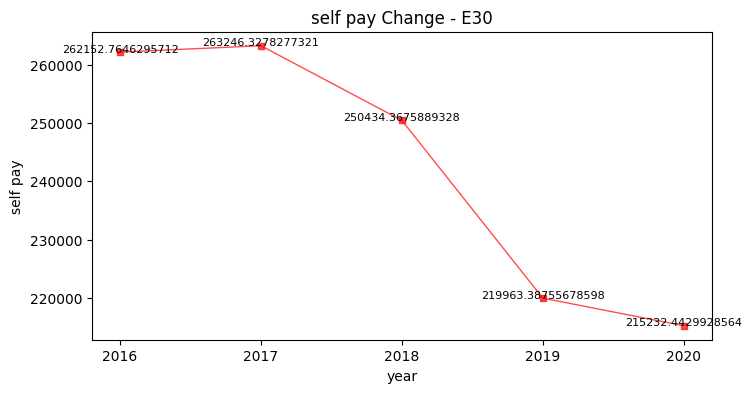

In [596]:
ptnt_updown(df_subt_f,"E30")

In [593]:
def ptnt_updown_fin(i, j):
    x = final_result1(i)
    
    return ptnt_updown(i, x.index[j])

In [594]:
ptnt_updown_fin(df_subt_f, 2)

NameError: ignored

In [604]:
def year_age(i):
df_f_10s

,code,year,age,sex,patients,visits,claims,total cost,insurance premium
0,A00,2016,10s,F,11,23,11,4073,3159
1,A01,2016,10s,F,12,90,20,19332,14951
2,A02,2016,10s,F,314,849,466,78388,60329
3,A03,2016,10s,F,26,72,28,12002,9612
4,A04,2016,10s,F,44354,66232,58629,2338440,1695732
...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,10s,F,53,117,114,18874,14953
8776,Z96,2020,10s,F,109,162,157,11611,6863
8777,Z97,2020,10s,F,198,230,230,7091,4844
8778,Z98,2020,10s,F,1535,3449,3321,140210,89640


In [ ]:
df_f_10s_piv = df_f_10s.pivot('CODE', 'YEAR', 'PTNT_CNT')

In [621]:
def age_pay_piv(i):
  
  i["self pay"]=(i["total cost"]-i["insurance premium"])*1000/i["patients"]
  i=i[i["patients"]>=30000]
  i=i[["code","self pay","patients","year"]]
  top=i.sort_values(by=["self pay"],ascending=[False]).head(10)
  top=top.rename(columns={"self pay":'본인부담금',"code":"CODE","patients":"환자수"})
  top=top[["CODE","본인부담금","환자수","year"]]
  top =top.pivot('CODE', 'year', '본인부담금')
  return top

In [630]:
c=age_pay_piv(df_f_10s)
c

year,2016,2017,2018,2019,2020
CODE,,,,,
B07,nan,nan,nan,nan,56627.75
E30,nan,213661.64,220043.48,198647.91,186844.36
F32,nan,nan,nan,nan,140818.32
M41,58177.33,nan,nan,nan,nan
S83,nan,54555.39,nan,56256.30,nan
Z11,nan,nan,nan,nan,53609.60


In [632]:
df_f_10s

,code,year,age,sex,patients,visits,claims,total cost,insurance premium,self pay
0,A00,2016,10s,F,11,23,11,4073,3159,83090.91
1,A01,2016,10s,F,12,90,20,19332,14951,365083.33
2,A02,2016,10s,F,314,849,466,78388,60329,57512.74
3,A03,2016,10s,F,26,72,28,12002,9612,91923.08
4,A04,2016,10s,F,44354,66232,58629,2338440,1695732,14490.42
...,...,...,...,...,...,...,...,...,...,...
8775,Z95,2020,10s,F,53,117,114,18874,14953,73981.13
8776,Z96,2020,10s,F,109,162,157,11611,6863,43559.63
8777,Z97,2020,10s,F,198,230,230,7091,4844,11348.48
8778,Z98,2020,10s,F,1535,3449,3321,140210,89640,32944.63


In [634]:
df_f_10s[df_f_10s["code"]=="B07"]

,code,year,age,sex,patients,visits,claims,total cost,insurance premium,self pay
92,B07,2016,10s,F,60277,167438,167401,8221253,5524390,44741.16
1848,B07,2017,10s,F,62227,177785,177766,9208301,6225800,47929.37
3604,B07,2018,10s,F,64647,190800,190778,10476083,7124744,51840.60
5360,B07,2019,10s,F,67132,200003,199966,11425139,7868567,52978.79
7116,B07,2020,10s,F,71777,226450,226477,13418039,9353469,56627.75


In [613]:
age_pay_piv(df_f_10)

,CODE,본인부담금,환자수
7237,C50,566469.05,35412
5481,C50,543737.57,34824
3725,C50,470876.93,33257
1969,C50,405515.83,30411
7306,D25,214467.77,120058
8110,N80,208153.46,37573
5550,D25,149260.49,109412
6354,N80,148429.53,34265
3794,D25,144838.74,102755
4598,N80,143767.72,31527
